In [1]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, 'Data')
data_dir

'/Users/dtjgp/Learning/GreenAI/Cloud/4090/Data'

In [3]:
# read the model info, including the model name, the number of parameters, and the number of MACs
# read the model training info, including the training time, each layer's training time, the epoch time and the epoch energy data
data_model_dir = os.path.join(data_dir, 'model_info')
# read all the json fiiels in the data_model_dir
fashionmnist_modelinfodict = json.load(open(os.path.join(data_model_dir, 'fashionmnist_modelinfodict.json')))
cifar100_modelinfodict = json.load(open(os.path.join(data_model_dir, 'cifar100_modelinfodict.json')))
cifar10_modelinfodict = json.load(open(os.path.join(data_model_dir, 'cifar10_modelinfodict.json')))
model_datapath_c = json.load(open(os.path.join(data_model_dir, 'model_data_c.json')))
model_datapath_f = json.load(open(os.path.join(data_model_dir, 'model_data_f.json')))
model_datapath_c10 = json.load(open(os.path.join(data_model_dir, 'model_data_c10.json')))
print('the model info of fashionmnist is:', fashionmnist_modelinfodict,'\n',
      'the model info of cifar100 is:', cifar100_modelinfodict, '\n',
      'the model info of cifar10 is:', cifar10_modelinfodict)
print('the model training info of fashionmnist is in the path:', model_datapath_f, '\n', 
      'the model training info of cifar100 is in the path:', model_datapath_c, '\n',
      'the model training info of cifar10 is in the path:', model_datapath_c10)

the model info of fashionmnist is: {'Alexnet': [665530000.0, 57030000.0], 'VGG11': [7580000000.0, 128810000.0], 'VGG13': [11300000000.0, 128990000.0], 'VGG16': [15460000000.0, 134300000.0], 'ResNet18': [1750000000.0, 11180000.0], 'ResNet34': [3600000000.0, 21290000.0], 'ResNet50': [2320000000.0, 13870000.0], 'GoogleNet': [1520000000.0, 5980000.0], 'GoogleNet_mod0': [406930000.0, 120070.0], 'GoogleNet_mod1': [1090000000.0, 3420000.0], 'GoogleNet_mod2': [1870000000.0, 7280000.0], 'GoogleNet_mod3': [2740000000.0, 11710000.0], 'GoogleNet_mod4': [3710000000.0, 16700000.0], 'GoogleNet_mod5': [455030000.0, 426780.0], 'GoogleNet_mod6': [578900000.0, 1320000.0], 'GoogleNet_mod7': [778240000.0, 2790000.0], 'GoogleNet_mod8': [1050000000.0, 4840000.0], 'GoogleNet_mod9': [544400000.0, 738300.0], 'GoogleNet_mod10': [688040000.0, 1400000.0], 'GoogleNet_mod11': [837560000.0, 2100000.0], 'GoogleNet_mod12': [992940000.0, 2830000.0], 'MobileNetV1': [567250000.0, 3210000.0], 'MobileNetV2': [325920000.0, 2

In [4]:
# fashionmnist data，read the model_data_f
ModelData_f = {}
for model_name, model_data_path in model_datapath_f.items():
    # the path is like /root/GreenAI/Cloud/4090/Data/alexnet_AllLayers/fashion_mnist/E20_B256_R0, but need to change to /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/alexnet_AllLayers/fashion_mnist/E20_B256_R0
    model_data_path = model_data_path.replace('/root/GreenAI/Cloud/4090', '/Users/dtjgp/Learning/GreenAI/Cloud/4090')
    # read the data from the model_data_path, load the npy file
    LayersTime = np.load(os.path.join(model_data_path, 'Layers_time.npy'), allow_pickle=True)
    TrainPartTime = np.load(os.path.join(model_data_path, 'Train_part_time.npy'), allow_pickle=True)
    EpochTime = np.load(os.path.join(model_data_path, 'Epoch_time.npy'), allow_pickle=True)
    EpochEnergy = np.load(os.path.join(model_data_path, 'Epoch_energy.npy'), allow_pickle=True)
    ModelData_f[model_name] = {'LayersTime': LayersTime, 'TrainPartTime': TrainPartTime, 'EpochTime': EpochTime, 'EpochEnergy': EpochEnergy}

# cifar100 data，read the model_data_c
ModelData_c = {}
for model_name, model_data_path in model_datapath_c.items():
    model_data_path = model_data_path.replace('/root/GreenAI/Cloud/4090', '/Users/dtjgp/Learning/GreenAI/Cloud/4090')
    LayersTime = np.load(os.path.join(model_data_path, 'Layers_time.npy'), allow_pickle=True)  
    TrainPartTime = np.load(os.path.join(model_data_path, 'Train_part_time.npy'), allow_pickle=True)
    EpochTime = np.load(os.path.join(model_data_path, 'Epoch_time.npy'), allow_pickle=True)
    EpochEnergy = np.load(os.path.join(model_data_path, 'Epoch_energy.npy'), allow_pickle=True)
    ModelData_c[model_name] = {'LayersTime': LayersTime, 'TrainPartTime': TrainPartTime, 'EpochTime': EpochTime, 'EpochEnergy': EpochEnergy}

# cifar10 data，read the model_data_c
ModelData_c10 = {}
for model_name, model_data_path in model_datapath_c10.items():
    model_data_path = model_data_path.replace('/root/GreenAI/Cloud/4090', '/Users/dtjgp/Learning/GreenAI/Cloud/4090')
    LayersTime = np.load(os.path.join(model_data_path, 'Layers_time.npy'), allow_pickle=True)  
    TrainPartTime = np.load(os.path.join(model_data_path, 'Train_part_time.npy'), allow_pickle=True)
    EpochTime = np.load(os.path.join(model_data_path, 'Epoch_time.npy'), allow_pickle=True)
    EpochEnergy = np.load(os.path.join(model_data_path, 'Epoch_energy.npy'), allow_pickle=True)
    ModelData_c10[model_name] = {'LayersTime': LayersTime, 'TrainPartTime': TrainPartTime, 'EpochTime': EpochTime, 'EpochEnergy': EpochEnergy}
    
# print the data
# print('the model data of fashionmnist is:', ModelData_f, '\n', 'th/e model data of cifar100 is:', ModelData_c)

In [5]:
def GetModeldf(modelinfodict):
    model_df = pd.DataFrame(modelinfodict).T.reset_index()
    model_df.columns = ['Model', 'MACs','Parameters']
    return model_df

def GetEpochEnergydf(ModelData):
    model_epochenergy = {}
    for model_name, model_data in ModelData.items():
        model_epochenergy_data = model_data['EpochEnergy']
        model_energy_postprocessdata = np.zeros((model_epochenergy_data.shape[0], 2))
        # get the total energy and average energy of each epoch and save them in the model_energy_postprocessdata
        for i in range(model_epochenergy_data.shape[0]):
            epoch_energy_data = model_epochenergy_data[i][0]
            record_epoch_lenth = len(epoch_energy_data)
            total_epoch_energy = sum(epoch_energy_data)
            avg_epoch_energy = total_epoch_energy / record_epoch_lenth
            model_energy_postprocessdata[i, 0] = total_epoch_energy
            model_energy_postprocessdata[i, 1] = avg_epoch_energy
            # print('the total energy of epoch', i, 'is:', total_epoch_energy, 'the average energy of epoch', i, 'is:', avg_epoch_energy,'the record epoch lenth is:', record_epoch_lenth)
        modelenergy_totalperepoch = np.mean(model_energy_postprocessdata[:, 0])
        modelenergy_avgperepoch = np.mean(model_energy_postprocessdata[:, 1])
        # round the energy to 2 decimal
        modelenergy_totalperepoch = round(modelenergy_totalperepoch, 2)
        modelenergy_avgperepoch = round(modelenergy_avgperepoch, 2)
        model_epochenergy[model_name] = {'TotalEnergyPerEpoch': modelenergy_totalperepoch, 'AverageEnergyPerSec': modelenergy_avgperepoch}
    energy_df = pd.DataFrame(model_epochenergy).T.reset_index()
    energy_df.columns = ['Model', 'TotalEnergyPerEpoch', 'AverageEnergyPerSec']
    return energy_df

def GetEpochTimedf(ModelData):
    # analyze the epoch energy time
    model_epochtime = {}
    for model_name, model_data in ModelData.items():
        model_epochtime_data = model_data['EpochTime']
        model_totaltime = sum(model_epochtime_data)
        model_avgtime = model_totaltime / len(model_epochtime_data)
        model_totaltime = round(model_totaltime, 2)
        model_avgtime = round(model_avgtime, 2)
        model_epochtime[model_name] = {'TotalTime': model_totaltime, 'AverageTimeperEpoch': model_avgtime}
    time_df = pd.DataFrame(model_epochtime).T.reset_index()
    time_df.columns = ['Model', 'TotalTime', 'AverageTimeperEpoch']
    return time_df

def GetTrainPartTimedf(ModelData):
    # analyze the epoch energy time
    model_trainparttime = {}
    for model_name, model_data in ModelData.items():
        model_trainparttime_data = model_data['TrainPartTime']
        data_shape = model_trainparttime_data.shape[0]
        if data_shape == 6:
            # drop the model_trainparttime_data third row and fifth row
            model_trainparttime_data = np.delete(model_trainparttime_data, 2, axis=0)
            model_trainparttime_data = np.delete(model_trainparttime_data, 3, axis=0)
        # print('the shape after drop is:', model_trainparttime_data.shape)
        trainparttime_data = np.zeros((model_trainparttime_data.shape[0], 2))
        trainparttime_total = np.sum(model_trainparttime_data, axis=1)
        trainparttime_avg = np.mean(model_trainparttime_data, axis=1)
        # round the energy to 2 decimal
        trainparttime_total = np.round(trainparttime_total, 2)
        trainparttime_avg = np.round(trainparttime_avg, 2)
        trainparttime_data[:, 0] = trainparttime_total
        trainparttime_data[:, 1] = trainparttime_avg
        model_trainparttime[model_name] = trainparttime_data
    data = []
    for model, times in model_trainparttime.items():
        flattened_times = [item for sublist in times for item in sublist]
        data.append([model] + flattened_times)
    columns = ['Model', 
            'Total Time to Device', 'Average Time to Device', 
            'Total Forward Time', 'Average Forward Time', 
            'Total Backward Time', 'Average Backward Time', 
            'Total Test Time', 'Average Test Time']
    train_part_time_df = pd.DataFrame(data, columns=columns)
    return train_part_time_df

def GetFinaldf(model_df, energy_df, time_df, train_part_time_df):
    df = pd.merge(model_df, energy_df, on='Model')
    df = pd.merge(df, time_df, on='Model')
    df = pd.merge(df, train_part_time_df, on='Model')
    return df
    

In [6]:
def PlotMACs_vs_Energy(df):
    palette = sns.color_palette("husl", len(df))
    
    plt.figure(figsize=(10,6))
    # MACs vs Total Energy per Epoch
    sns.scatterplot(data=df, x='MACs', y='TotalEnergyPerEpoch', hue='Model', palette=palette)
    for i in range(df.shape[0]):    
        plt.text(df.iloc[i]["MACs"], df.iloc[i]['TotalEnergyPerEpoch'], df.iloc[i]['Model'], fontsize=7, color=palette[i])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('MACs')
    plt.ylabel('Total Energy per Epoch')
    plt.title('MACs vs Total Energy per Epoch')
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
    plt.figure(figsize=(10, 6))
    # MACs vs Average Energy per Epoch
    sns.scatterplot(data=df, x='MACs', y='AverageEnergyPerSec', hue='Model', palette=palette)
    for i in range(df.shape[0]):
        plt.text(df['MACs'][i], df['AverageEnergyPerSec'][i], df['Model'][i], fontsize=7, color=palette[i])
    plt.xscale('log')
    # plt.yscale('log')
    plt.xlabel('MACs')
    plt.ylabel('Average Energy per Second')
    plt.title('MACs vs Average Energy per Second')
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
def PlotParas_vs_Time(df):
    palette = sns.color_palette("husl", len(df))
    
    plt.figure(figsize=(10, 6))
    # Parameters vs Total Energy per Epoch
    sns.scatterplot(data=df, x='Parameters', y='TotalEnergyPerEpoch', hue='Model', palette=palette)
    for i in range(df.shape[0]):
        plt.text(df['Parameters'][i], df['TotalEnergyPerEpoch'][i], df['Model'][i], fontsize=7, color=palette[i])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Parameters')
    plt.ylabel('Total Energy per Epoch')
    plt.title('Parameters vs Total Energy per Epoch')
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
    plt.figure(figsize=(10, 6))
    # Parameters vs Average Energy per Epoch
    sns.scatterplot(data=df, x='Parameters', y='AverageEnergyPerSec', hue='Model', palette=palette)
    for i in range(df.shape[0]):
        plt.text(df['Parameters'][i], df['AverageEnergyPerSec'][i], df['Model'][i], fontsize=7, color=palette[i])
    plt.xscale('log')
    # plt.yscale('log')
    plt.xlabel('Parameters')
    plt.ylabel('Average Energy per Second')
    plt.title('Parameters vs Average Energy per Second')
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [7]:
# def PlotMACs_vs_TrainPartTime(df):
#     # Define a color palette for the points
#     palette = sns.color_palette("husl", len(df))

#     # Plot 1: MACs vs Total Time to Device
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(data=df, x='MACs', y='Total Time to Device', hue='Model', palette=palette)
#     for i in range(df.shape[0]):
#         plt.text(df['MACs'][i], df['Total Time to Device'][i], df['Model'][i], fontsize=7, color=palette[i])
#     plt.xlabel('MACs')
#     plt.ylabel('Total Time to Device (seconds)')
#     plt.title('MACs vs Total Time to Device')
#     plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
#     plt.show()

#     # Plot 2: MACs vs Total Forward Time
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(data=df, x='MACs', y='Total Forward Time', hue='Model', palette=palette)
#     for i in range(df.shape[0]):
#         plt.text(df['MACs'][i], df['Total Forward Time'][i], df['Model'][i], fontsize=7, color=palette[i])
#     plt.xscale('log')
#     plt.xlabel('MACs')
#     plt.ylabel('Total Forward Time (seconds)')
#     plt.title('MACs vs Total Forward Time')
#     plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
#     plt.show()

#     # Plot 3: MACs vs Total Backward Time
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(data=df, x='MACs', y='Total Backward Time', hue='Model', palette=palette)
#     for i in range(df.shape[0]):
#         plt.text(df['MACs'][i], df['Total Backward Time'][i], df['Model'][i], fontsize=7, color=palette[i])
#     plt.xscale('log')
#     plt.xlabel('MACs')
#     plt.ylabel('Total Backward Time (seconds)')
#     plt.title('MACs vs Total Backward Time')
#     plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
#     plt.show()

#     # Plot 4: MACs vs Total Test Time
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(data=df, x='MACs', y='Total Test Time', hue='Model', palette=palette)   
#     for i in range(df.shape[0]):
#         plt.text(df['MACs'][i], df['Total Test Time'][i], df['Model'][i], fontsize=7, color=palette[i])
#     plt.xscale('log')
#     plt.xlabel('MACs')
#     plt.ylabel('Total Test Time (seconds)')
#     plt.title('MACs vs Total Test Time')
#     plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
#     plt.show()
    
#     # Plot 5: MACs vs forwardEnergy
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(data=df, x='MACs', y='forwardEnergy', hue='Model', palette=palette)
#     for i in range(df.shape[0]):
#         plt.text(df['MACs'][i], df['forwardEnergy'][i], df['Model'][i], fontsize=7, color=palette[i])
#     plt.xscale('log')
#     plt.xlabel('MACs')
#     plt.ylabel('Total forward Energy (J)')
#     plt.title('MACs vs Total forward Energy')
#     plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
#     plt.show()
    
#     # Plot 6: MACs vs backwardEnergy
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(data=df, x='MACs', y='backwardEnergy', hue='Model', palette=palette)
#     for i in range(df.shape[0]):
#         plt.text(df['MACs'][i], df['backwardEnergy'][i], df['Model'][i], fontsize=7, color=palette[i])
#     plt.xscale('log')
#     plt.xlabel('MACs')
#     plt.ylabel('Total backward Energy (J)')
#     plt.title('MACs vs Total backward Energy')
#     plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
#     plt.show()
    

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def PlotMACs_vs_TrainPartTime(df):
    # Define a color palette for the points
    palette = sns.color_palette("husl", len(df))

    # Plot 1: MACs vs Total Time to Device
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='MACs', y='Total Time to Device', hue='Model', palette=palette)
    for i in range(df.shape[0]):
        macs = df.iloc[i]['MACs']
        total_time_to_device = df.iloc[i]['Total Time to Device']
        model = df.iloc[i]['Model']
        plt.text(macs, total_time_to_device, model, fontsize=7, color=palette[i])
    plt.xlabel('MACs')
    plt.ylabel('Total Time to Device (seconds)')
    plt.title('MACs vs Total Time to Device')
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    # Plot 2: MACs vs Total Forward Time
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='MACs', y='Total Forward Time', hue='Model', palette=palette)
    for i in range(df.shape[0]):
        macs = df.iloc[i]['MACs']
        total_forward_time = df.iloc[i]['Total Forward Time']
        model = df.iloc[i]['Model']
        plt.text(macs, total_forward_time, model, fontsize=7, color=palette[i])
    plt.xscale('log')
    plt.xlabel('MACs')
    plt.ylabel('Total Forward Time (seconds)')
    plt.title('MACs vs Total Forward Time')
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    # Plot 3: MACs vs Total Backward Time
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='MACs', y='Total Backward Time', hue='Model', palette=palette)
    for i in range(df.shape[0]):
        macs = df.iloc[i]['MACs']
        total_backward_time = df.iloc[i]['Total Backward Time']
        model = df.iloc[i]['Model']
        plt.text(macs, total_backward_time, model, fontsize=7, color=palette[i])
    plt.xscale('log')
    plt.xlabel('MACs')
    plt.ylabel('Total Backward Time (seconds)')
    plt.title('MACs vs Total Backward Time')
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    # Plot 4: MACs vs Total Test Time
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='MACs', y='Total Test Time', hue='Model', palette=palette)   
    for i in range(df.shape[0]):
        macs = df.iloc[i]['MACs']
        total_test_time = df.iloc[i]['Total Test Time']
        model = df.iloc[i]['Model']
        plt.text(macs, total_test_time, model, fontsize=7, color=palette[i])
    plt.xscale('log')
    plt.xlabel('MACs')
    plt.ylabel('Total Test Time (seconds)')
    plt.title('MACs vs Total Test Time')
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
    # Plot 5: MACs vs forwardEnergy
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='MACs', y='forwardEnergy', hue='Model', palette=palette)
    for i in range(df.shape[0]):
        macs = df.iloc[i]['MACs']
        forward_energy = df.iloc[i]['forwardEnergy']
        model = df.iloc[i]['Model']
        plt.text(macs, forward_energy, model, fontsize=7, color=palette[i])
    plt.xscale('log')
    plt.xlabel('MACs')
    plt.yscale('log')
    plt.ylabel('Total forward Energy (J)')
    plt.title('MACs vs Total forward Energy')
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
    # Plot 6: MACs vs backwardEnergy
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='MACs', y='backwardEnergy', hue='Model', palette=palette)
    for i in range(df.shape[0]):
        macs = df.iloc[i]['MACs']
        backward_energy = df.iloc[i]['backwardEnergy']
        model = df.iloc[i]['Model']
        plt.text(macs, backward_energy, model, fontsize=7, color=palette[i])
    plt.xscale('log')
    plt.xlabel('MACs')
    plt.yscale('log')
    plt.ylabel('Total backward Energy (J)')
    plt.title('MACs vs Total backward Energy')
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [9]:
def PlotParas_vs_TrainPartTime(df):
    # Define a color palette for the points
    palette = sns.color_palette("husl", len(df))
    
    # Plot 1: MACs vs Total Time to Device
    plt.figure(figsize=(10, 6))
    # the y value is the product of the Total Time to Device and the Average Energy per Second
    sns.scatterplot(data=df, x='Parameters', y='Total Time to Device', hue='Model', palette=palette)
    for i in range(df.shape[0]):
        plt.text(df['Parameters'][i], df['Total Time to Device'][i]*df['AverageEnergyPerSec'][i], df['Model'][i], fontsize=7, color=palette[i])
    plt.xlabel('Params')
    plt.ylabel('Total Time to Device (seconds)')
    plt.title('Params vs Total Time to Device')
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    # Plot 2: MACs vs Total Forward Time
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Parameters', y='Total Forward Time', hue='Model', palette=palette)
    for i in range(df.shape[0]):
        plt.text(df['Parameters'][i], df['Total Forward Time'][i], df['Model'][i], fontsize=7, color=palette[i])
    plt.xscale('log')
    plt.xlabel('Params')
    plt.ylabel('Total Forward Time (seconds)')
    plt.title('Params vs Total Forward Time')
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    # Plot 3: MACs vs Total Backward Time
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Parameters', y='Total Backward Time', hue='Model', palette=palette)
    for i in range(df.shape[0]):
        plt.text(df['Parameters'][i], df['Total Backward Time'][i], df['Model'][i], fontsize=7, color=palette[i])
    plt.xscale('log')
    plt.xlabel('Params')
    plt.ylabel('Total Backward Time (seconds)')
    plt.title('Params vs Total Backward Time')
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    # Plot 4: MACs vs Total Test Time
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Parameters', y='Total Test Time', hue='Model', palette=palette)   
    for i in range(df.shape[0]):
        plt.text(df['Parameters'][i], df['Total Test Time'][i], df['Model'][i], fontsize=7, color=palette[i])
    plt.xscale('log')
    plt.xlabel('Params')
    plt.ylabel('Total Test Time (seconds)')
    plt.title('Params vs Total Test Time')
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()


In [10]:
def PlotEpochEnergy_vs_EpochTime(df):
    # Define a color palette for the points
    palette = sns.color_palette("husl", len(df))
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='AverageTimeperEpoch', y='TotalEnergyPerEpoch', hue='Model', palette=palette)   
    for i in range(df.shape[0]):
        plt.text(df['AverageTimeperEpoch'][i], df['TotalEnergyPerEpoch'][i], df['Model'][i], fontsize=7, color=palette[i])
    plt.xscale('log')
    plt.xlabel('Avg Time per Epcoh(s)')
    plt.ylabel('Total Energy per Epoch(J)')
    plt.title('Avg Time vs Energy per Epoch')
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [11]:
def PlotForwardTime_vs_BackwardTime(df):
    # Define a color palette for the points
    palette = sns.color_palette("husl", len(df))
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Total Forward Time', y='Total Backward Time', hue='Model', palette=palette)   
    for i in range(df.shape[0]):
        plt.text(df['Total Forward Time'][i], df['Total Backward Time'][i], df['Model'][i], fontsize=7, color=palette[i])
    # plt.xscale('log')
    plt.xlabel('Total Forward Time per Epcoh(s)')
    plt.ylabel('Total Backward Time per Epcoh(s)')
    plt.title('Forward Time vs Backward Time per Epoch')
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

#### fashion_mnist

In [12]:
model_df_f = GetModeldf(fashionmnist_modelinfodict)
energy_df_f = GetEpochEnergydf(ModelData_f)
time_df_f = GetEpochTimedf(ModelData_f)
train_part_time_df_f = GetTrainPartTimedf(ModelData_f)
df_f = GetFinaldf(model_df_f, energy_df_f, time_df_f, train_part_time_df_f)
df_f

Model          MACs   Parameters  TotalEnergyPerEpoch  \
0           Alexnet  6.655300e+08   57030000.0              2627.00   
1             VGG11  7.580000e+09  128810000.0             27264.35   
2             VGG13  1.130000e+10  128990000.0             43858.97   
3             VGG16  1.546000e+10  134300000.0             54043.96   
4          ResNet18  1.750000e+09   11180000.0             10202.03   
5          ResNet34  3.600000e+09   21290000.0             17610.77   
6          ResNet50  2.320000e+09   13870000.0             14077.76   
7         GoogleNet  1.520000e+09    5980000.0             11261.41   
8    GoogleNet_mod0  4.069300e+08     120070.0              3921.18   
9    GoogleNet_mod1  1.090000e+09    3420000.0              6796.91   
10   GoogleNet_mod2  1.870000e+09    7280000.0             10417.52   
11   GoogleNet_mod3  2.740000e+09   11710000.0             14491.21   
12   GoogleNet_mod4  3.710000e+09   16700000.0             19219.50   
13   GoogleNet_mod5  4.550300e+08     426780.0              4667.51   
14   GoogleNet_mod6  5.789000e+08    1320000.0              5741.72   
15   GoogleNet_mod7  7.782400e+08    2790000.0              7291.01   
16   GoogleNet_mod8  1.050000e+09    4840000.0              9153.57   
17   GoogleNet_mod9  5.444000e+08     738300.0              4667.78   
18  GoogleNet_mod10  6.880400e+08    1400000.0              5562.06   
19  GoogleNet_mod11  8.375600e+08    2100000.0              6546.48   
20  GoogleNet_mod12  9.929400e+08    2830000.0              7749.38   
21      MobileNetV1  5.672500e+08    3210000.0              7186.24   
22      MobileNetV2  3.259200e+08    2240000.0             14388.42   

    AverageEnergyPerSec  TotalTime  AverageTimeperEpoch  Total Time to Device  \
0                184.48     277.36                13.87                 41.25   
1                324.59    1667.45                83.37                 47.60   
2                350.60    2494.23               124.71                 47.43   
3                360.06    2987.17               149.36                 47.13   
4                256.70     786.20                39.31                 46.92   
5                292.56    1199.54                59.98                 48.64   
6                256.90    1087.51                54.38                 47.15   
7                269.49     828.63                41.43                 52.71   
8                204.30     378.32                18.92                 47.66   
9                251.32     532.14                26.61                 44.10   
10               277.82     740.92                37.05                 46.18   
11               295.74     972.61                48.63                 47.04   
12               310.50    1227.00                61.35                 43.96   
13               221.81     412.43                20.62                 48.54   
14               239.75     469.65                23.48                 48.03   
15               260.39     549.10                27.46                 48.52   
16               278.24     645.68                32.28                 48.30   
17               208.57     438.90                21.95                 47.80   
18               222.48     491.09                24.55                 46.95   
19               233.81     551.85                27.59                 45.21   
20               239.94     635.31                31.77                 51.98   
21               272.80     519.60                25.98                 47.36   
22               265.98    1071.68                53.58                 47.79   

    Average Time to Device  Total Forward Time  Average Forward Time  \
0                     2.06               41.13                  2.06   
1                     2.38              477.64                 23.88   
2                     2.37              732.13                 36.61   
3                     2.36              890.96                 44.55   
4   

In [13]:
# add a column that is the product of the Total Time to Device and the Average Energy per Second
df_f['ttdEnergy'] = df_f['Total Time to Device'] * df_f['AverageEnergyPerSec']
# add a column that is the product of the Total Forward Time and the Average Energy per Second
df_f['forwardEnergy'] = df_f['Total Forward Time'] * df_f['AverageEnergyPerSec']
# add a column that is the product of the Total Backward Time and the Average Energy per Second
df_f['backwardEnergy'] = df_f['Total Backward Time'] * df_f['AverageEnergyPerSec']
df_f

Model          MACs   Parameters  TotalEnergyPerEpoch  \
0           Alexnet  6.655300e+08   57030000.0              2627.00   
1             VGG11  7.580000e+09  128810000.0             27264.35   
2             VGG13  1.130000e+10  128990000.0             43858.97   
3             VGG16  1.546000e+10  134300000.0             54043.96   
4          ResNet18  1.750000e+09   11180000.0             10202.03   
5          ResNet34  3.600000e+09   21290000.0             17610.77   
6          ResNet50  2.320000e+09   13870000.0             14077.76   
7         GoogleNet  1.520000e+09    5980000.0             11261.41   
8    GoogleNet_mod0  4.069300e+08     120070.0              3921.18   
9    GoogleNet_mod1  1.090000e+09    3420000.0              6796.91   
10   GoogleNet_mod2  1.870000e+09    7280000.0             10417.52   
11   GoogleNet_mod3  2.740000e+09   11710000.0             14491.21   
12   GoogleNet_mod4  3.710000e+09   16700000.0             19219.50   
13   GoogleNet_mod5  4.550300e+08     426780.0              4667.51   
14   GoogleNet_mod6  5.789000e+08    1320000.0              5741.72   
15   GoogleNet_mod7  7.782400e+08    2790000.0              7291.01   
16   GoogleNet_mod8  1.050000e+09    4840000.0              9153.57   
17   GoogleNet_mod9  5.444000e+08     738300.0              4667.78   
18  GoogleNet_mod10  6.880400e+08    1400000.0              5562.06   
19  GoogleNet_mod11  8.375600e+08    2100000.0              6546.48   
20  GoogleNet_mod12  9.929400e+08    2830000.0              7749.38   
21      MobileNetV1  5.672500e+08    3210000.0              7186.24   
22      MobileNetV2  3.259200e+08    2240000.0             14388.42   

    AverageEnergyPerSec  TotalTime  AverageTimeperEpoch  Total Time to Device  \
0                184.48     277.36                13.87                 41.25   
1                324.59    1667.45                83.37                 47.60   
2                350.60    2494.23               124.71                 47.43   
3                360.06    2987.17               149.36                 47.13   
4                256.70     786.20                39.31                 46.92   
5                292.56    1199.54                59.98                 48.64   
6                256.90    1087.51                54.38                 47.15   
7                269.49     828.63                41.43                 52.71   
8                204.30     378.32                18.92                 47.66   
9                251.32     532.14                26.61                 44.10   
10               277.82     740.92                37.05                 46.18   
11               295.74     972.61                48.63                 47.04   
12               310.50    1227.00                61.35                 43.96   
13               221.81     412.43                20.62                 48.54   
14               239.75     469.65                23.48                 48.03   
15               260.39     549.10                27.46                 48.52   
16               278.24     645.68                32.28                 48.30   
17               208.57     438.90                21.95                 47.80   
18               222.48     491.09                24.55                 46.95   
19               233.81     551.85                27.59                 45.21   
20               239.94     635.31                31.77                 51.98   
21               272.80     519.60                25.98                 47.36   
22               265.98    1071.68                53.58                 47.79   

    Average Time to Device  Total Forward Time  Average Forward Time  \
0                     2.06               41.13                  2.06   
1                     2.38              477.64                 23.88   
2                     2.37              732.13                 36.61   
3                     2.36              890.96                 44.55   
4   

In [14]:
# remove all the rows with name does not contrain ‘GoogleNet’
dfgoogle_f = df_f[df_f['Model'].str.contains('GoogleNet')]
dfgoogle_f  

Model          MACs  Parameters  TotalEnergyPerEpoch  \
7         GoogleNet  1.520000e+09   5980000.0             11261.41   
8    GoogleNet_mod0  4.069300e+08    120070.0              3921.18   
9    GoogleNet_mod1  1.090000e+09   3420000.0              6796.91   
10   GoogleNet_mod2  1.870000e+09   7280000.0             10417.52   
11   GoogleNet_mod3  2.740000e+09  11710000.0             14491.21   
12   GoogleNet_mod4  3.710000e+09  16700000.0             19219.50   
13   GoogleNet_mod5  4.550300e+08    426780.0              4667.51   
14   GoogleNet_mod6  5.789000e+08   1320000.0              5741.72   
15   GoogleNet_mod7  7.782400e+08   2790000.0              7291.01   
16   GoogleNet_mod8  1.050000e+09   4840000.0              9153.57   
17   GoogleNet_mod9  5.444000e+08    738300.0              4667.78   
18  GoogleNet_mod10  6.880400e+08   1400000.0              5562.06   
19  GoogleNet_mod11  8.375600e+08   2100000.0              6546.48   
20  GoogleNet_mod12  9.929400e+08   2830000.0              7749.38   

    AverageEnergyPerSec  TotalTime  AverageTimeperEpoch  Total Time to Device  \
7                269.49     828.63                41.43                 52.71   
8                204.30     378.32                18.92                 47.66   
9                251.32     532.14                26.61                 44.10   
10               277.82     740.92                37.05                 46.18   
11               295.74     972.61                48.63                 47.04   
12               310.50    1227.00                61.35                 43.96   
13               221.81     412.43                20.62                 48.54   
14               239.75     469.65                23.48                 48.03   
15               260.39     549.10                27.46                 48.52   
16               278.24     645.68                32.28                 48.30   
17               208.57     438.90                21.95                 47.80   
18               222.48     491.09                24.55                 46.95   
19               233.81     551.85                27.59                 45.21   
20               239.94     635.31                31.77                 51.98   

    Average Time to Device  Total Forward Time  Average Forward Time  \
7                     2.64              197.74                  9.89   
8                     2.38               71.65                  3.58   
9                     2.21              125.14                  6.26   
10                    2.31              180.86                  9.04   
11                    2.35              241.73                 12.09   
12                    2.20              308.69                 15.43   
13                    2.43               87.50                  4.37   
14                    2.40              105.80                  5.29   
15                    2.43              126.08                  6.30   
16                    2.42              150.13                  7.51   
17                    2.39               92.16                  4.61   
18                    2.35              107.24                  5.36   
19                    2.26              123.27                  6.16   
20                    2.60              142.02                  7.10   

    Total Backward Time  Average Backward Time  Total Test Time  \
7                406.06                  20.30            66.32   
8                125.30                   6.26            54.21   
9                234.06                  11.70            53.35   
10               369.74                  18.49            60.82   
11               528.99                  26.45            69.87   
12               714.79                  35.74            79.62   
13               144.99                   7.25            52.65   
14               182.42                   9.12            51.62   
15               238.34                  11.92            52.26

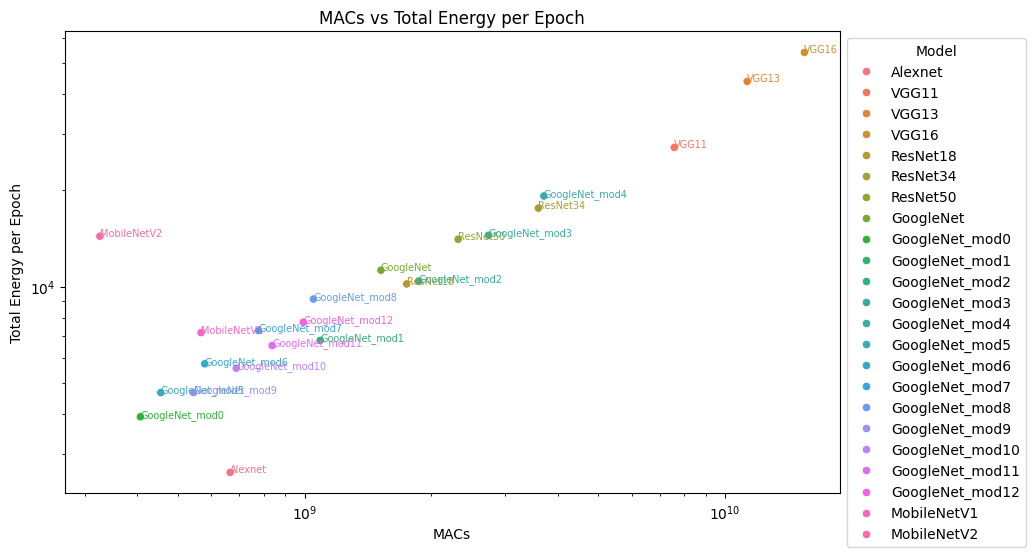

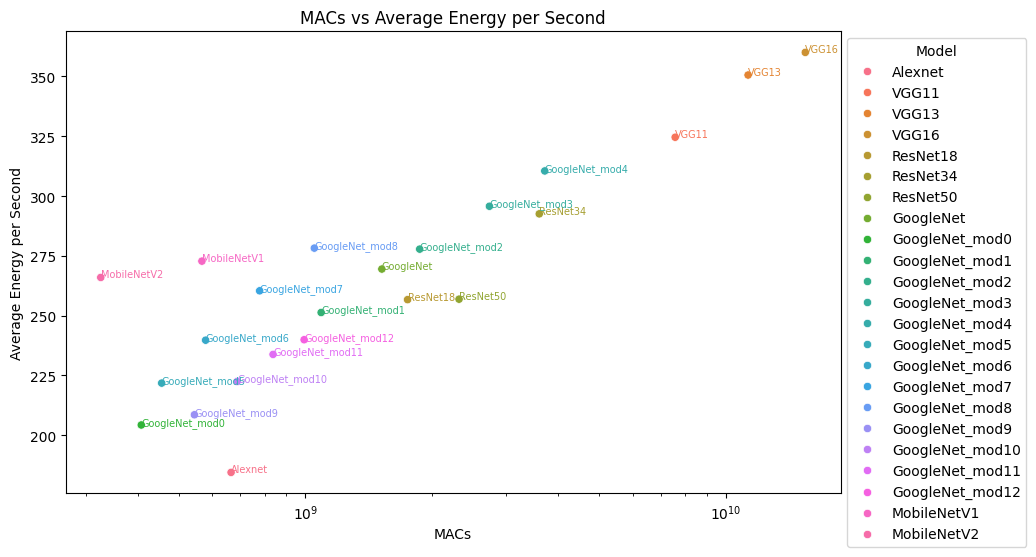

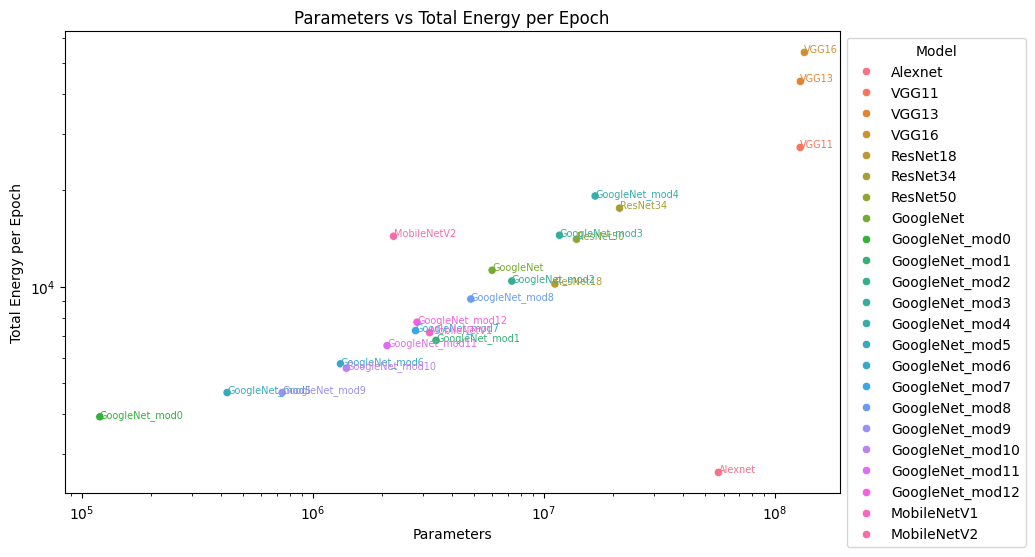

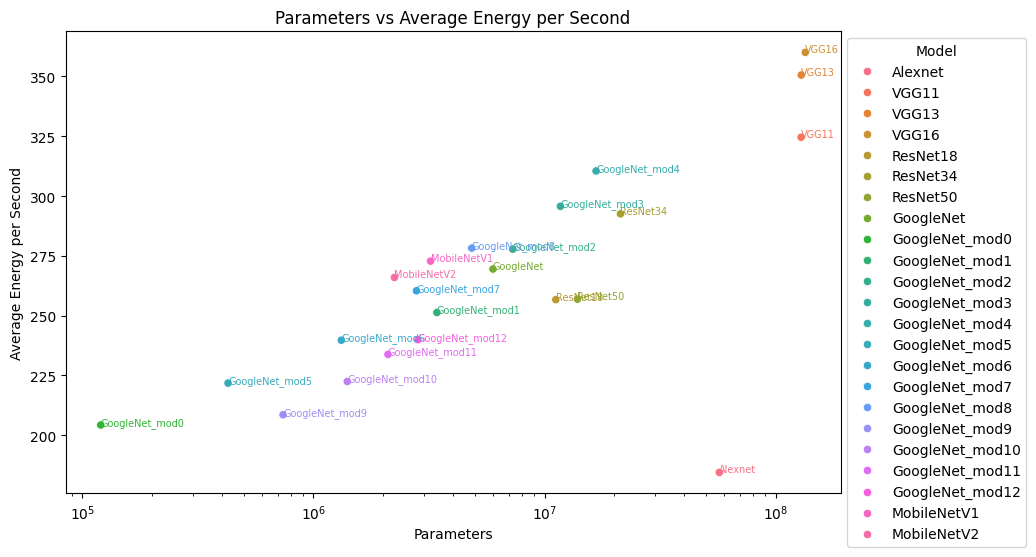

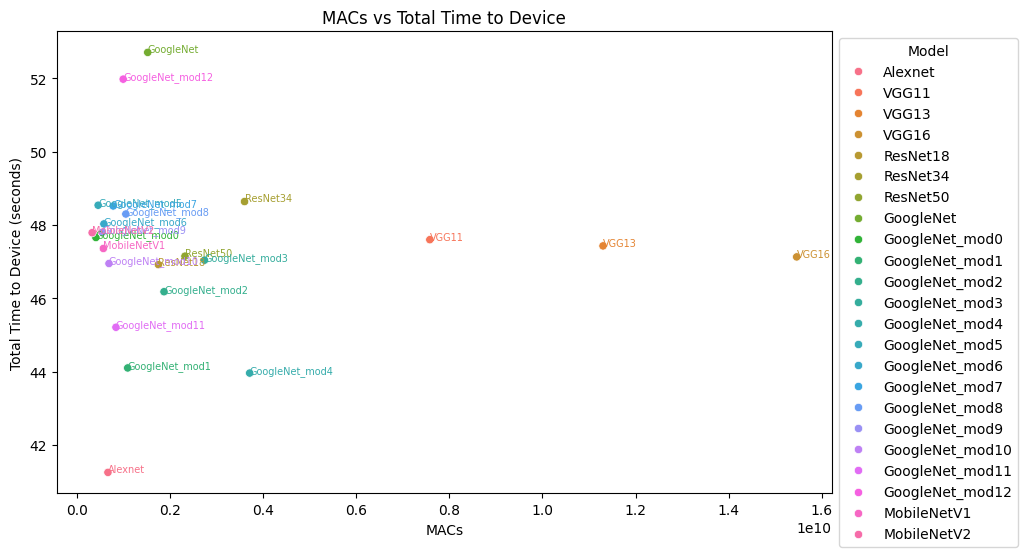

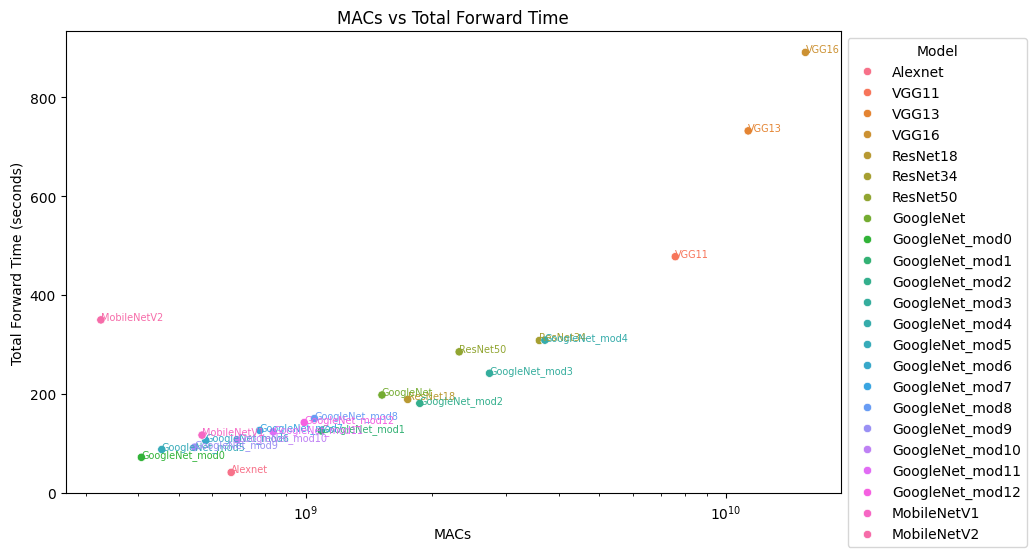

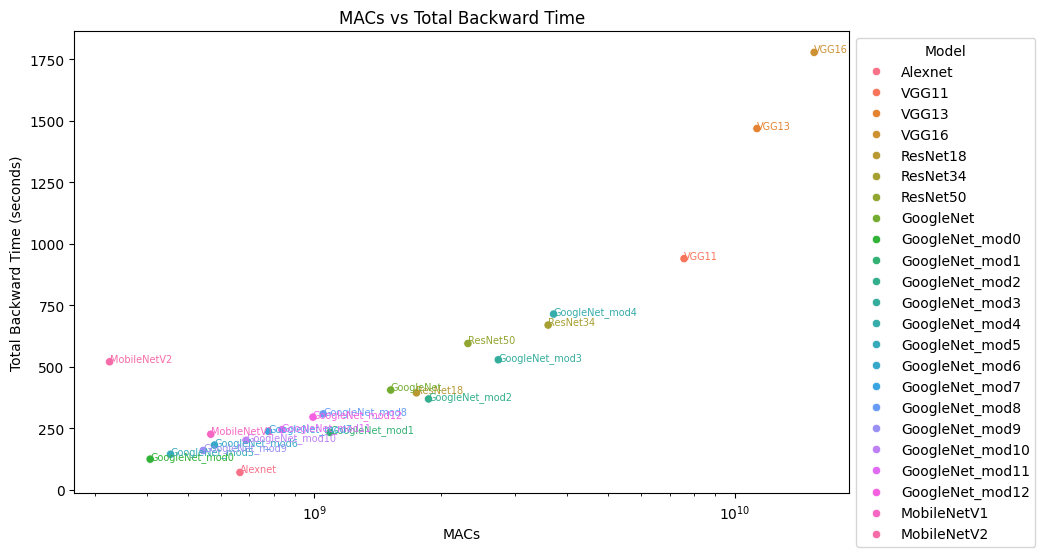

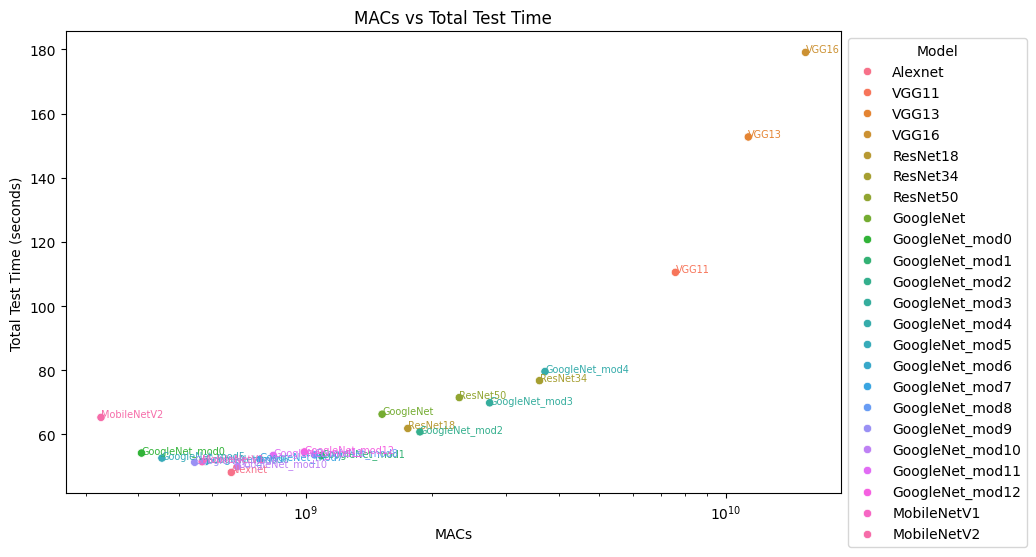

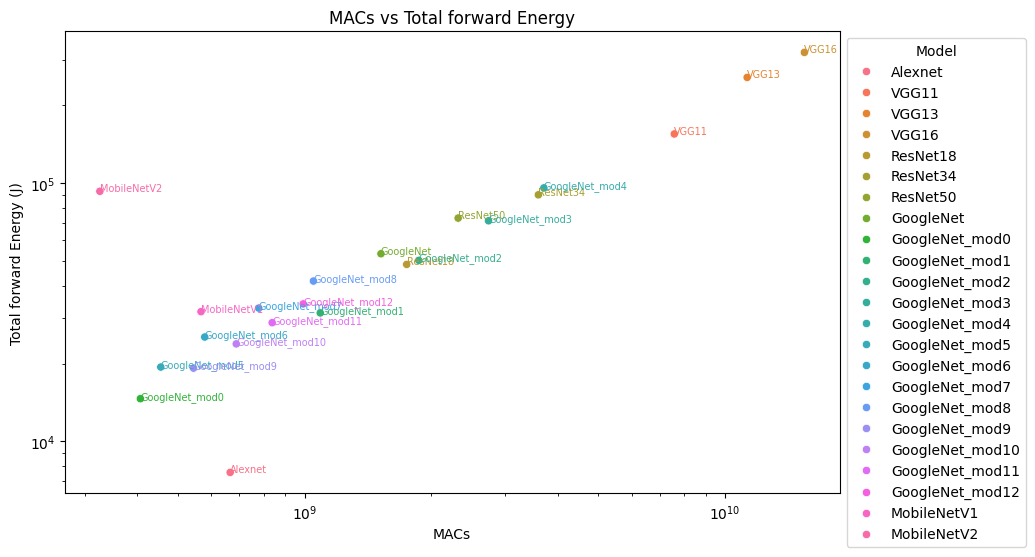

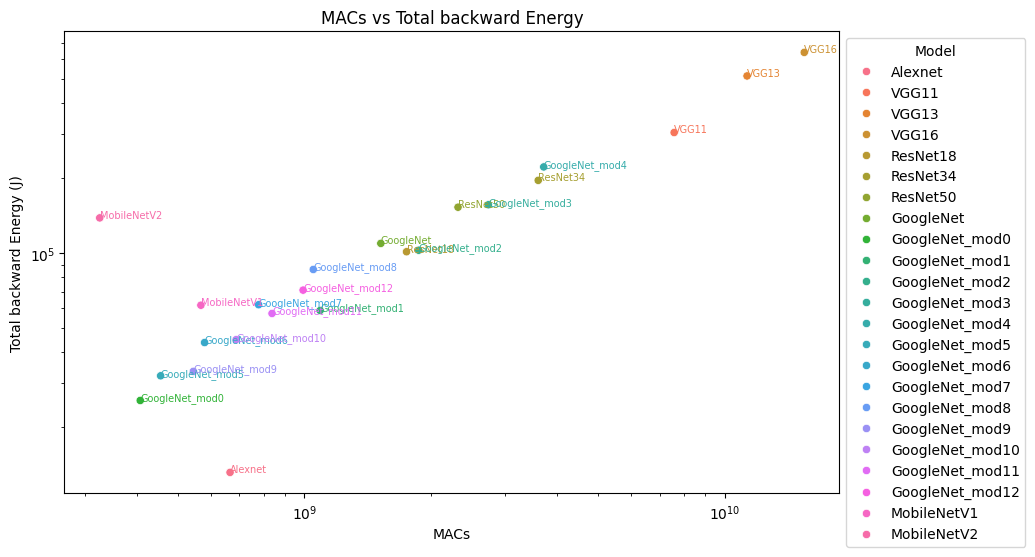

ValueError: Image size of 1027x620514 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

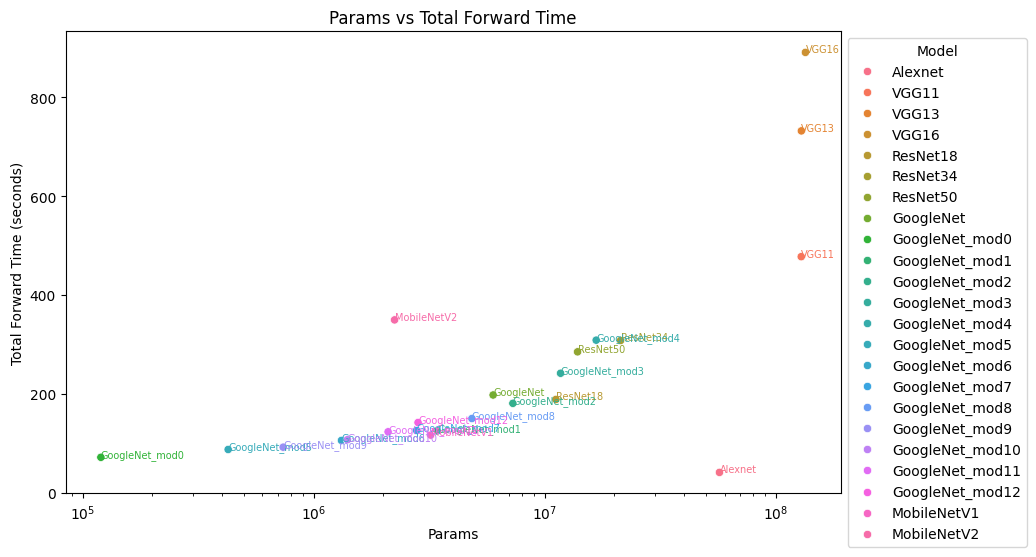

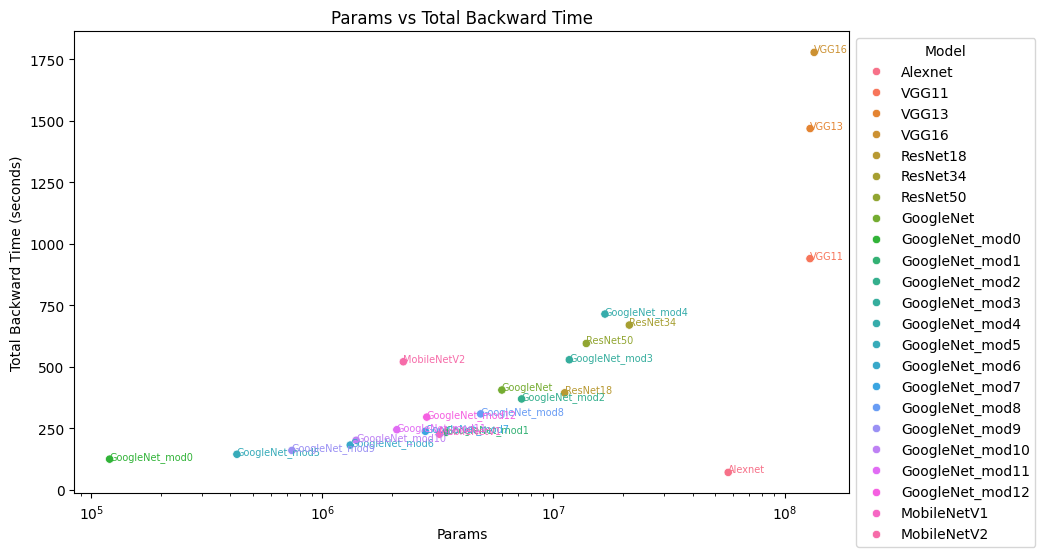

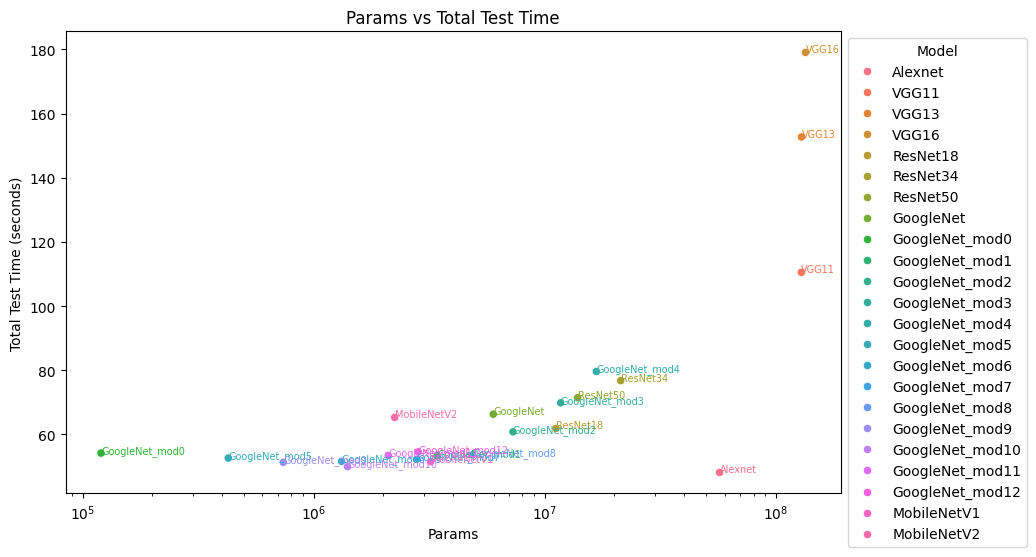

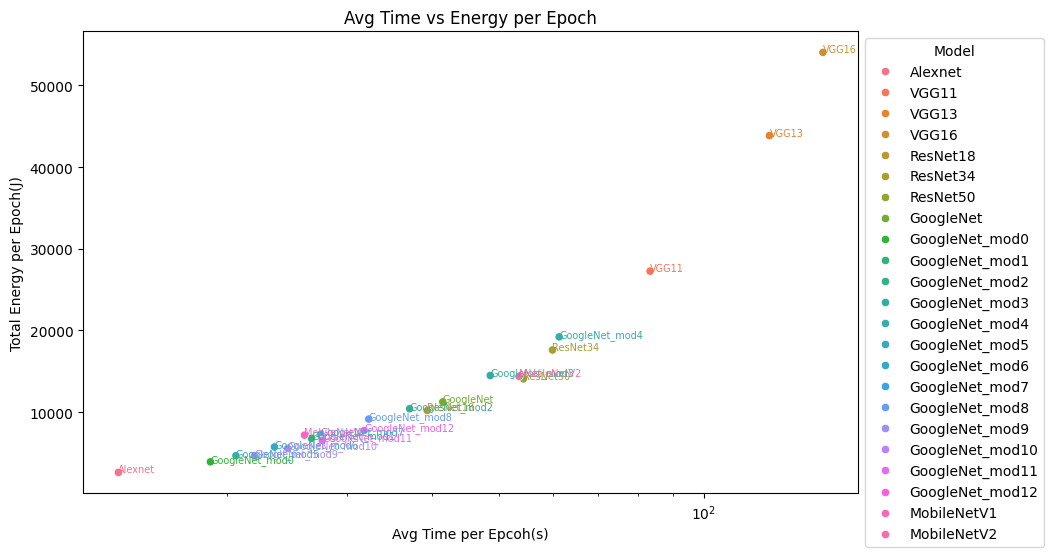

In [15]:
PlotMACs_vs_Energy(df_f)
PlotParas_vs_Time(df_f)
PlotMACs_vs_TrainPartTime(df_f)
PlotParas_vs_TrainPartTime(df_f)
PlotEpochEnergy_vs_EpochTime(df_f)

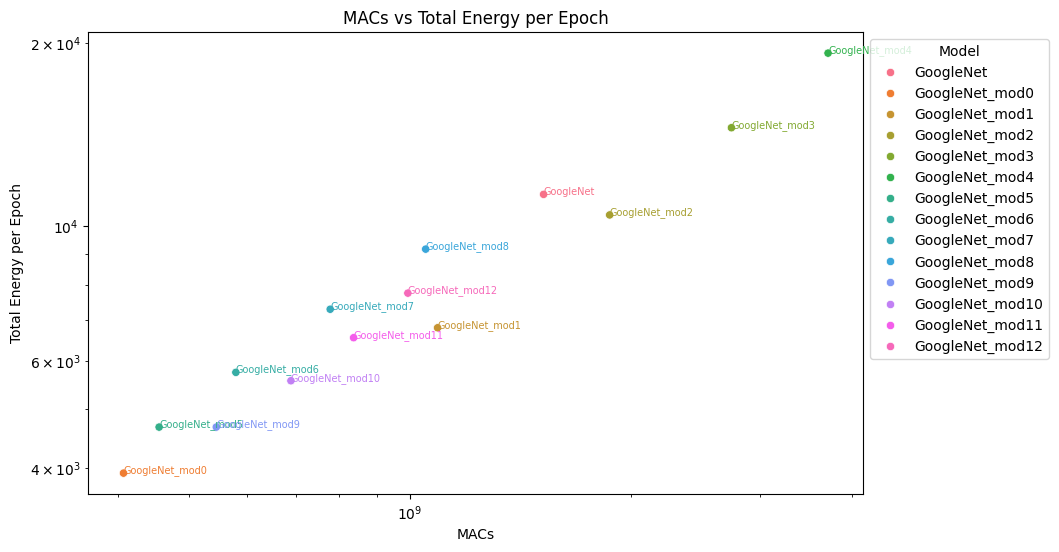

KeyError: 0

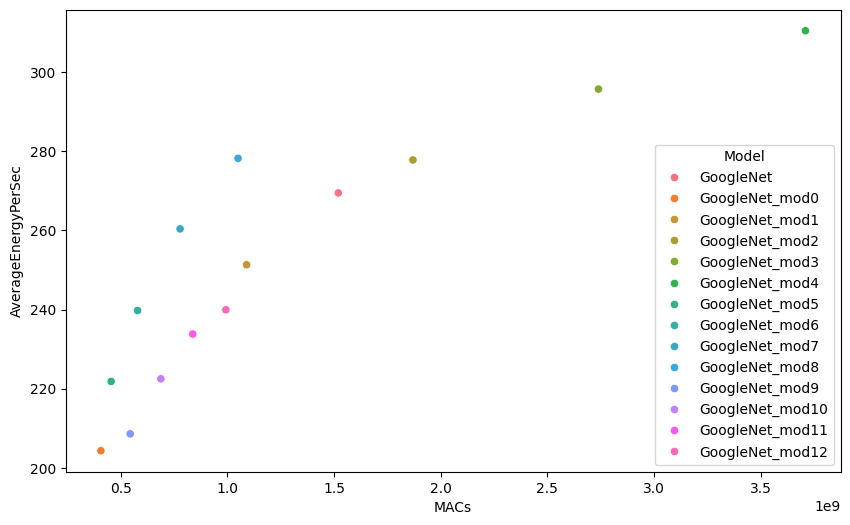

In [16]:
PlotMACs_vs_Energy(dfgoogle_f)
# PlotParas_vs_Time(df_f)
# PlotMACs_vs_TrainPartTime(df_f)
# PlotParas_vs_TrainPartTime(df_f)
# PlotEpochEnergy_vs_EpochTime(df_f)

#### cifar100

In [ ]:
model_df_c = GetModeldf(cifar100_modelinfodict)
energy_df_c = GetEpochEnergydf(ModelData_c)
time_df_c = GetEpochTimedf(ModelData_c)
train_part_time_df_c = GetTrainPartTimedf(ModelData_c)
df_c = GetFinaldf(model_df_c, energy_df_c, time_df_c, train_part_time_df_c)
# df_f

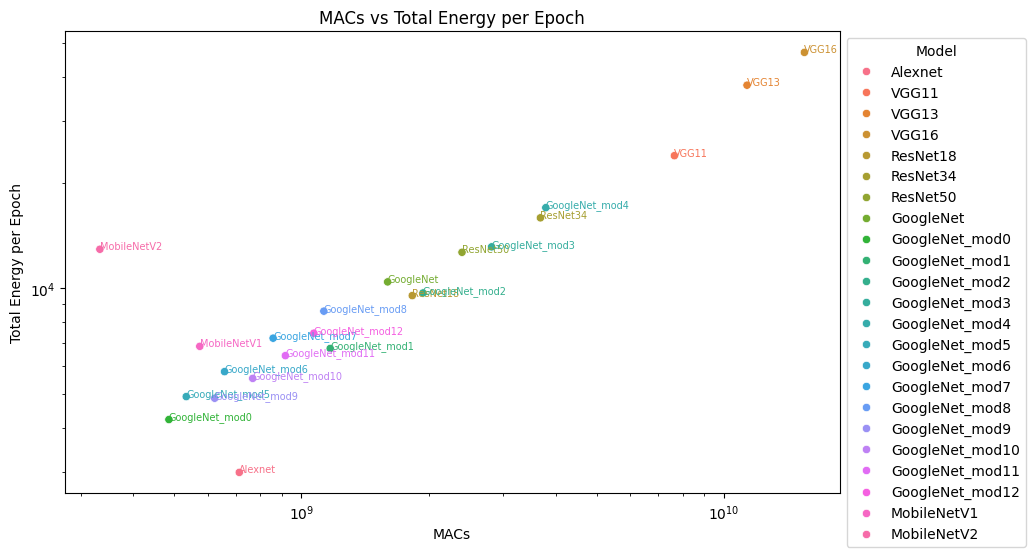

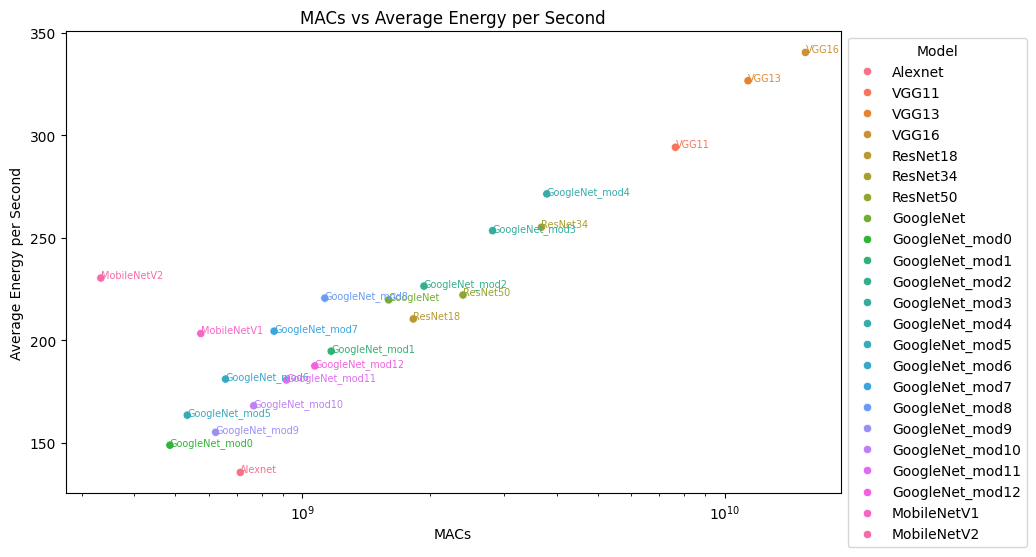

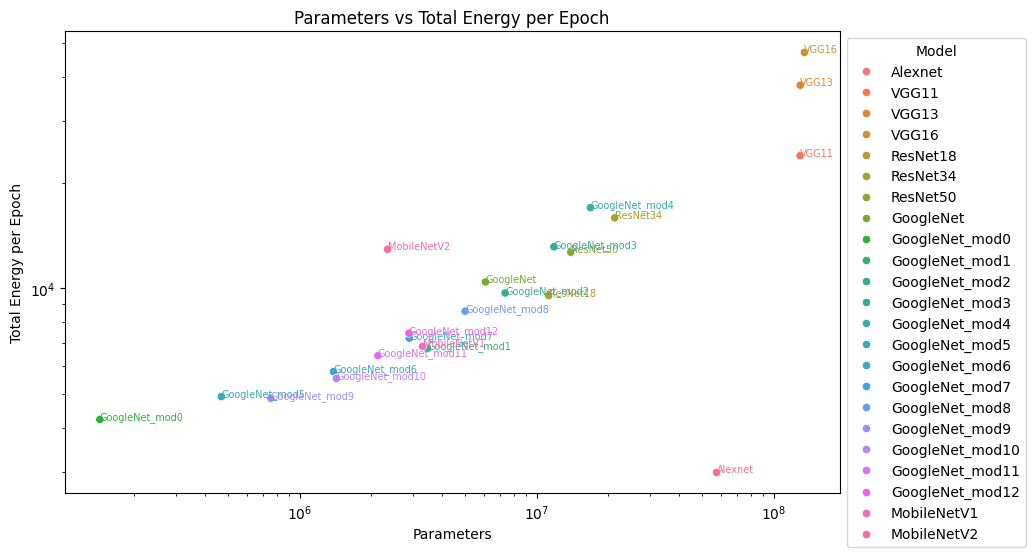

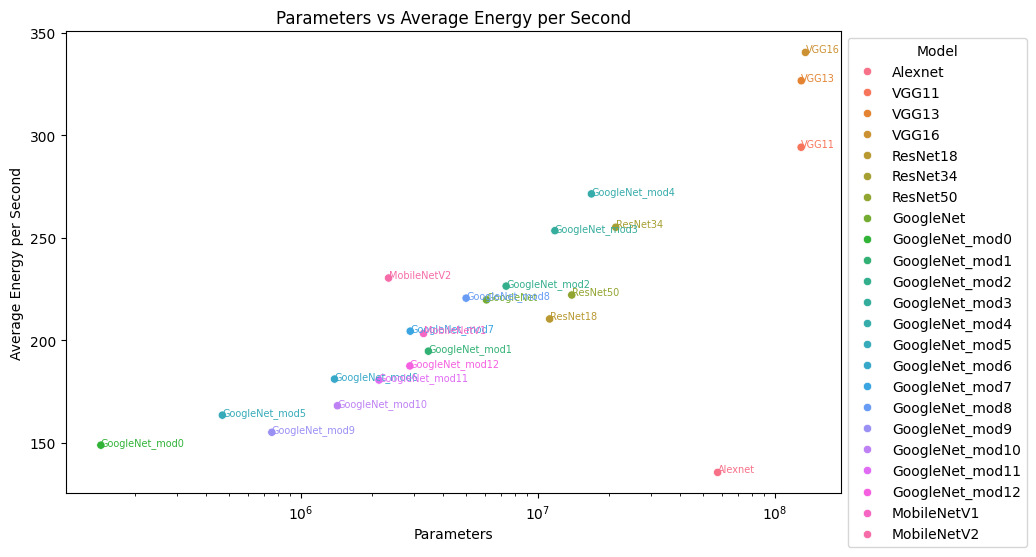

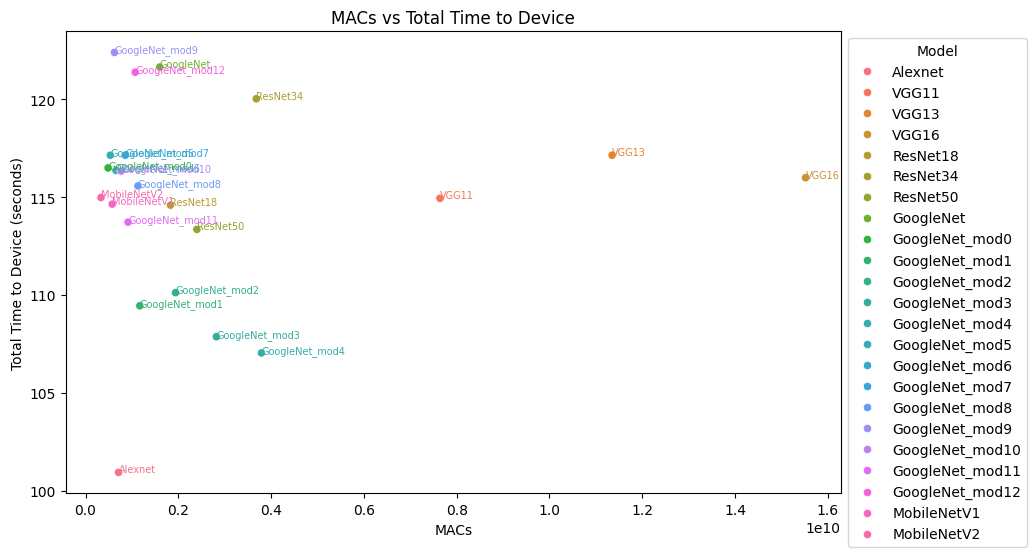

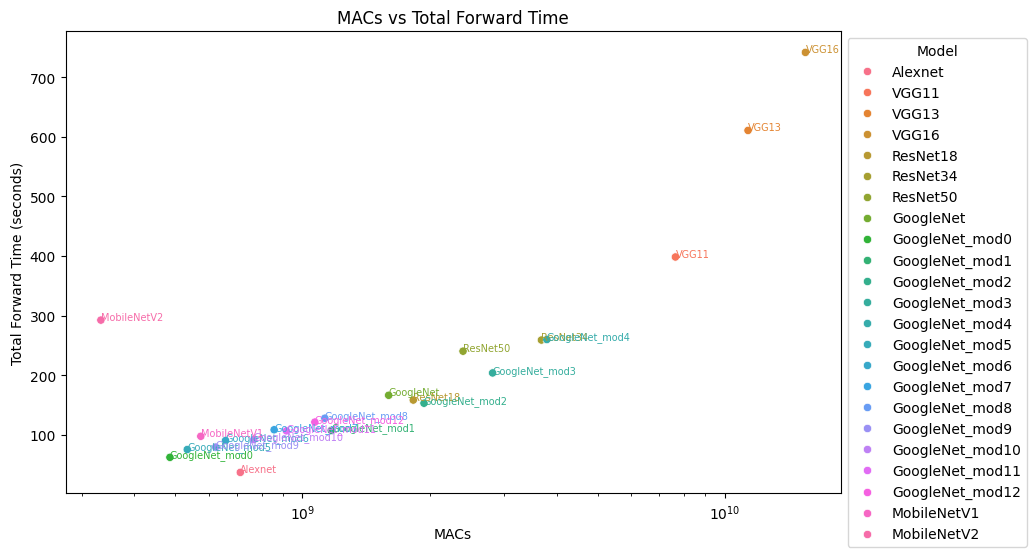

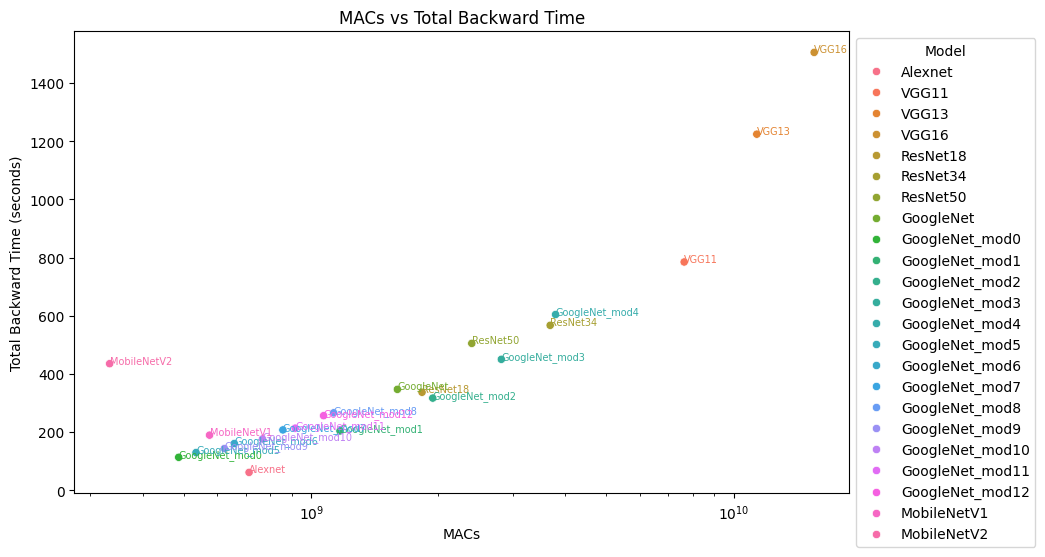

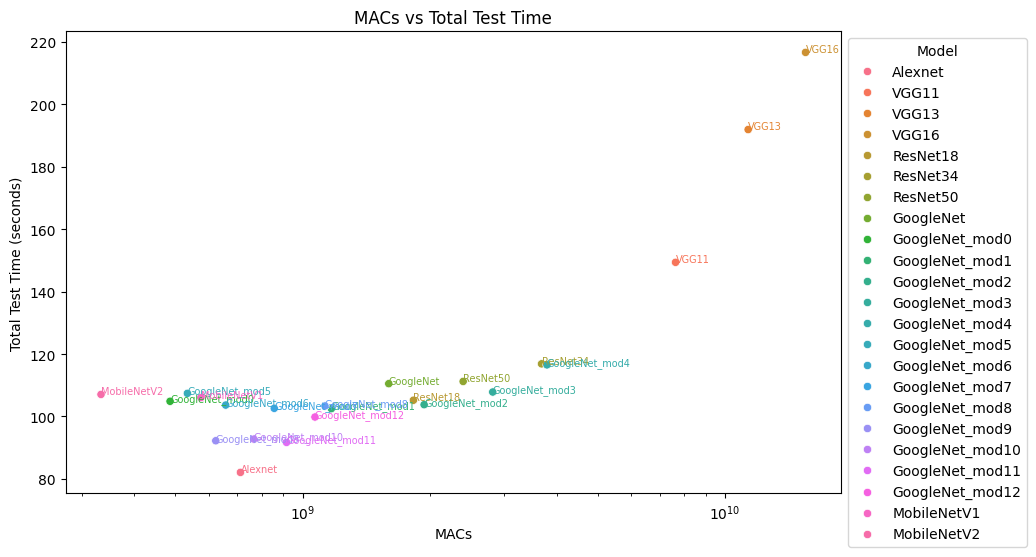

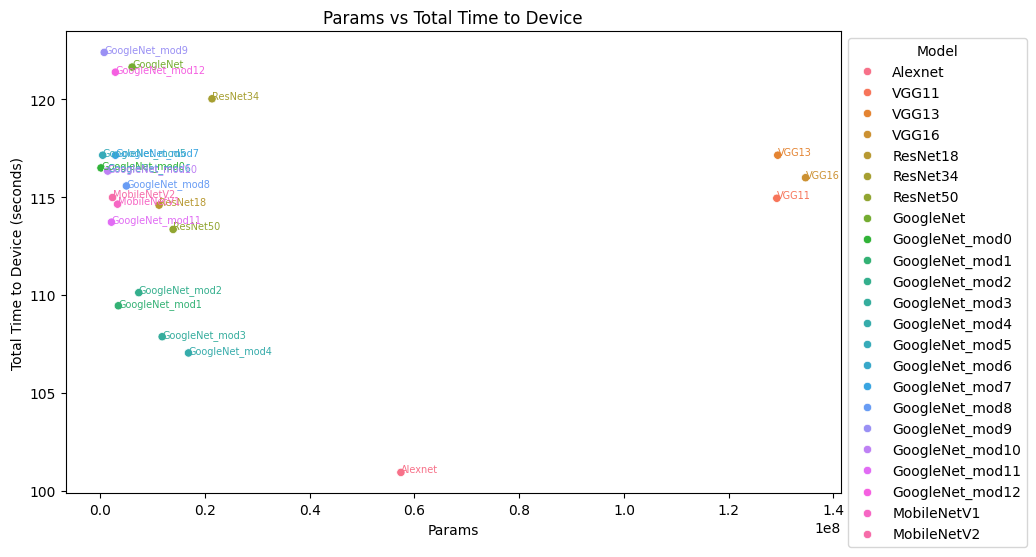

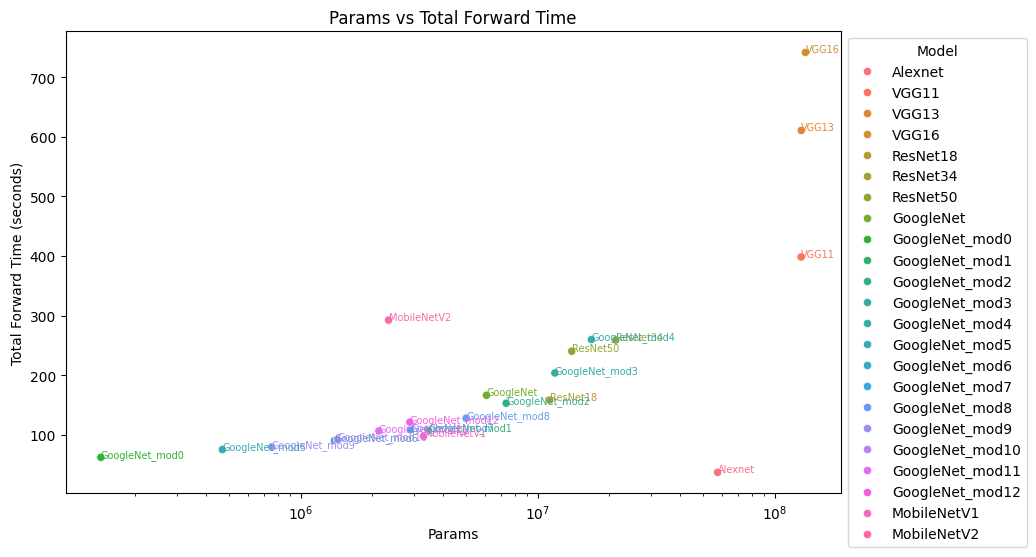

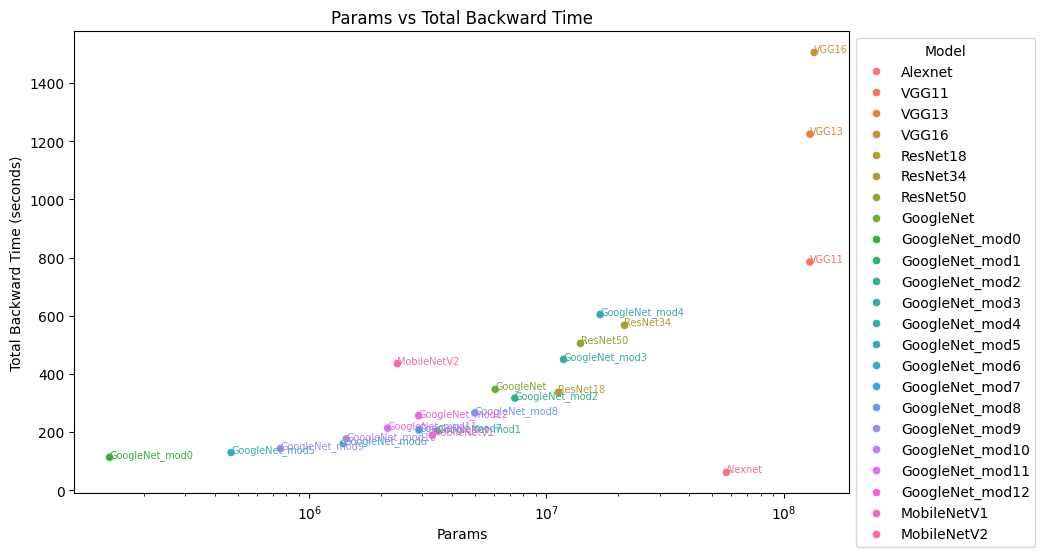

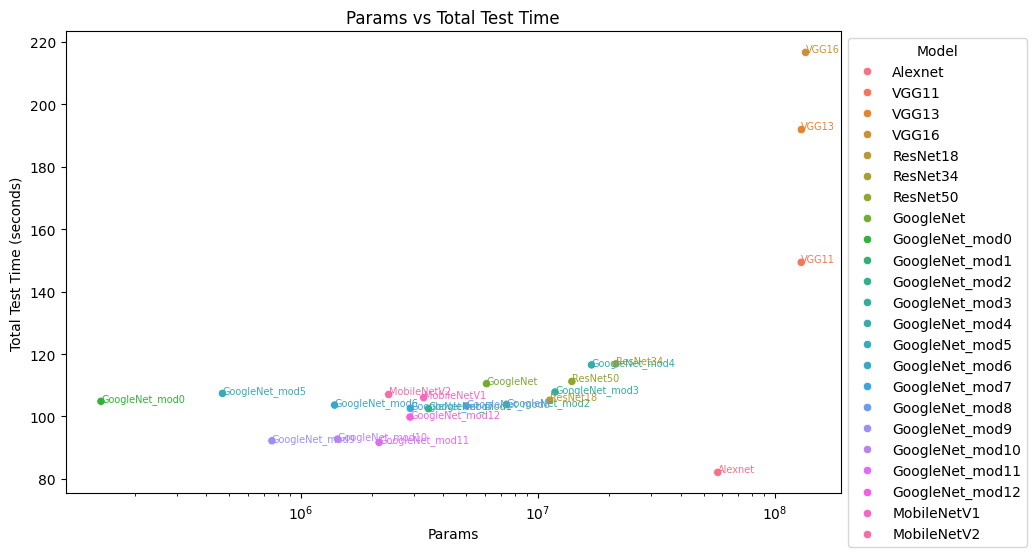

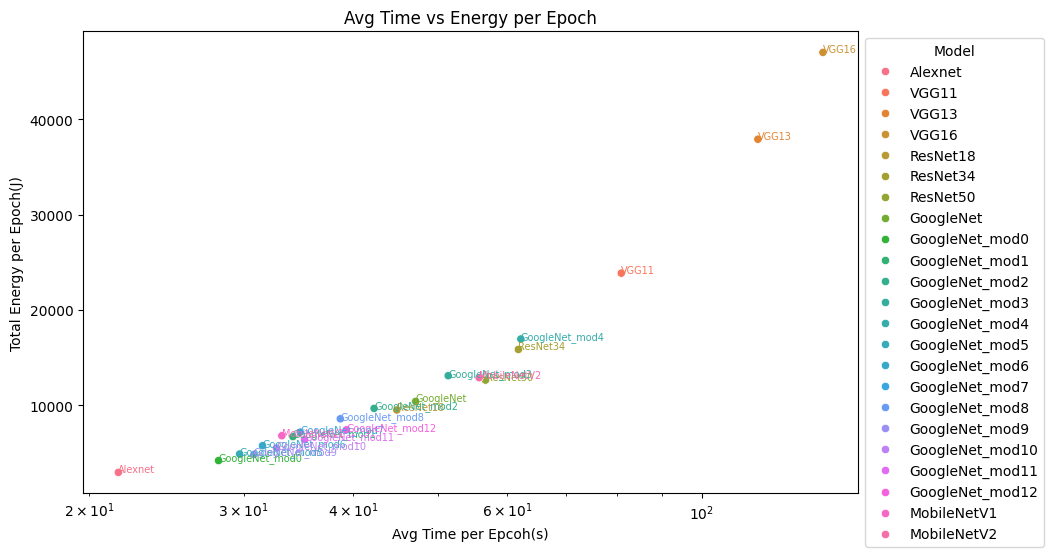

In [ ]:
PlotMACs_vs_Energy(df_c)
PlotParas_vs_Time(df_c)
PlotMACs_vs_TrainPartTime(df_c)
PlotParas_vs_TrainPartTime(df_c)
PlotEpochEnergy_vs_EpochTime(df_c)

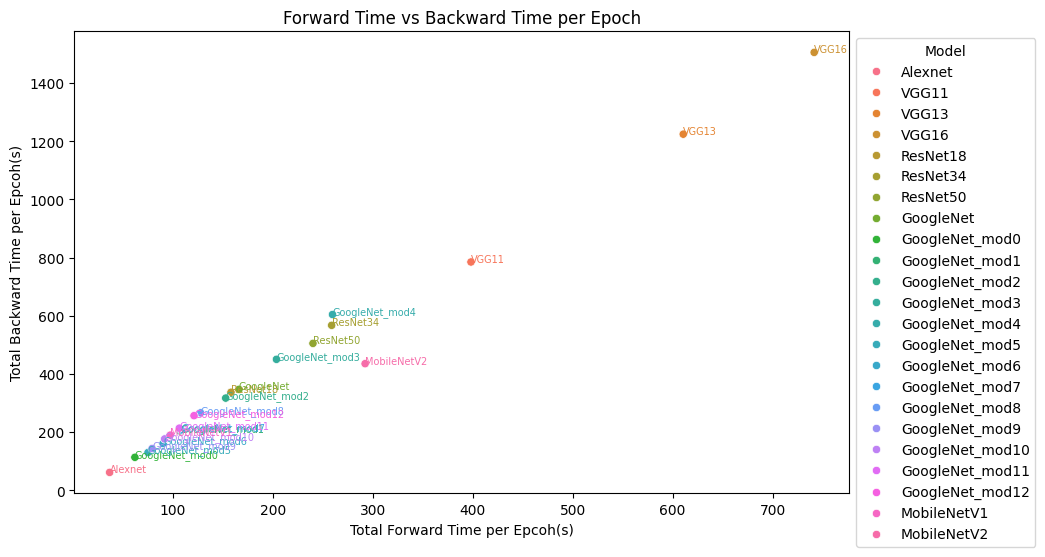

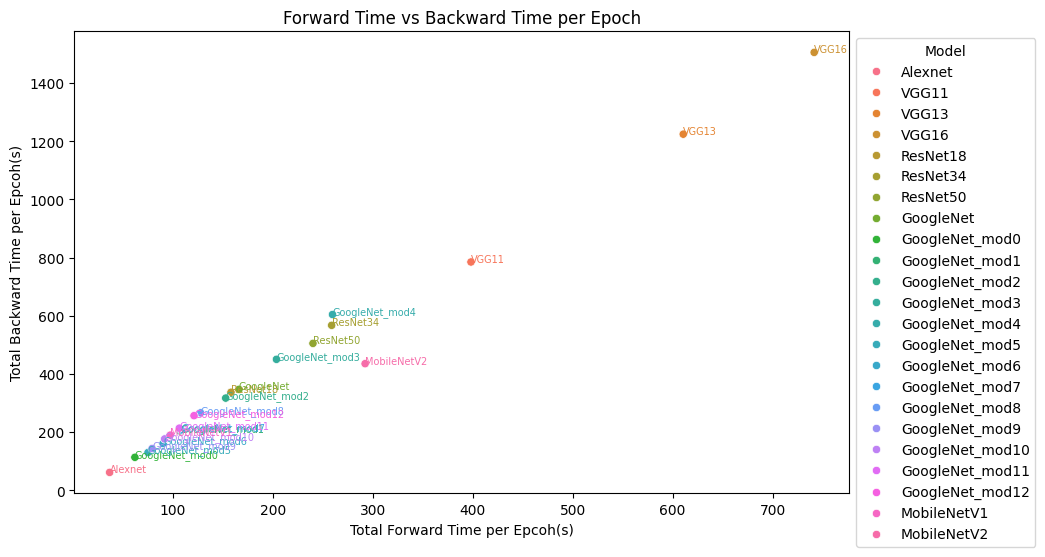

In [ ]:
PlotForwardTime_vs_BackwardTime(df_c)
PlotForwardTime_vs_BackwardTime(df_c)

#### cifar10

In [ ]:
model_df_c10 = GetModeldf(cifar10_modelinfodict)
energy_df_c10 = GetEpochEnergydf(ModelData_c10)
time_df_c10 = GetEpochTimedf(ModelData_c10)
train_part_time_df_c10 = GetTrainPartTimedf(ModelData_c10)
df_c10 = GetFinaldf(model_df_c10, energy_df_c10, time_df_c10, train_part_time_df_c10)

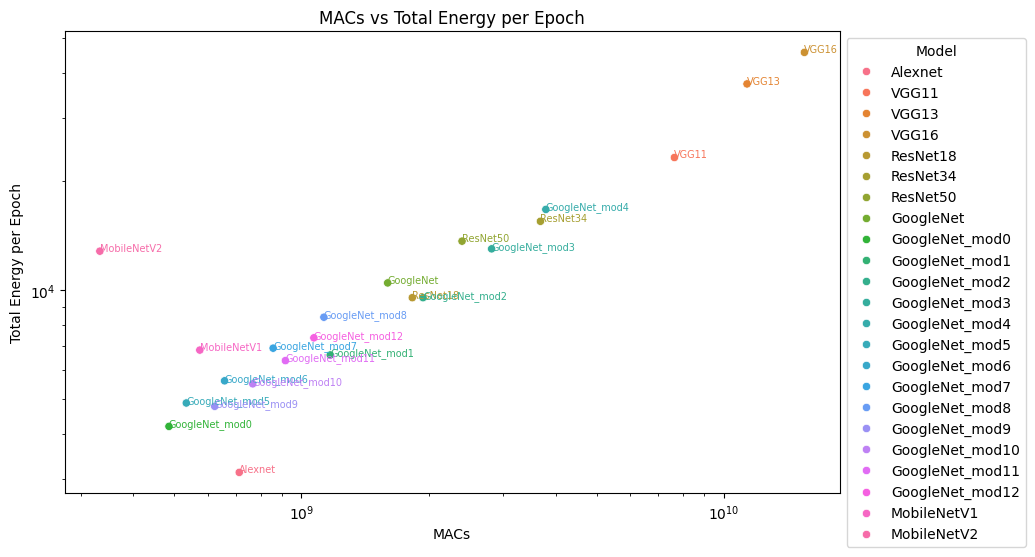

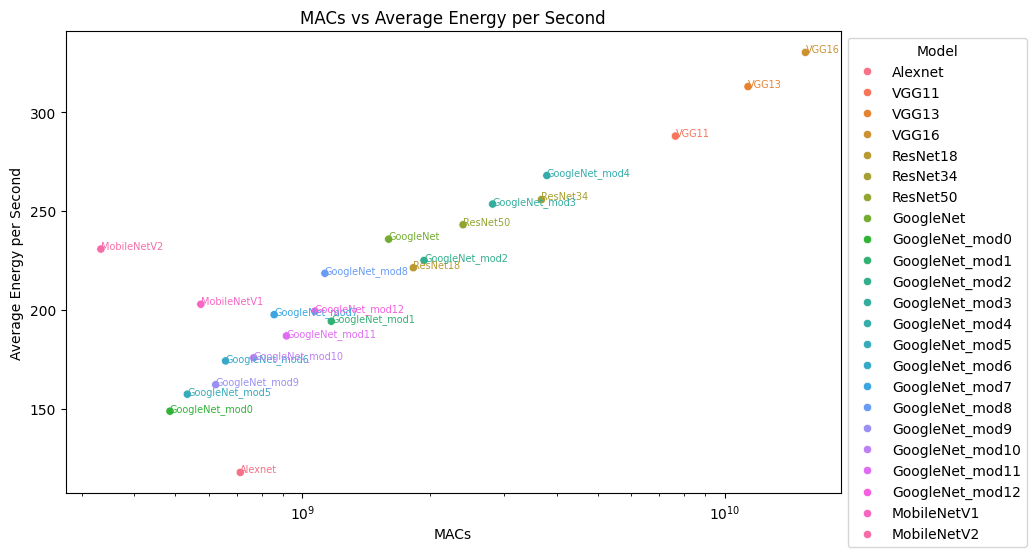

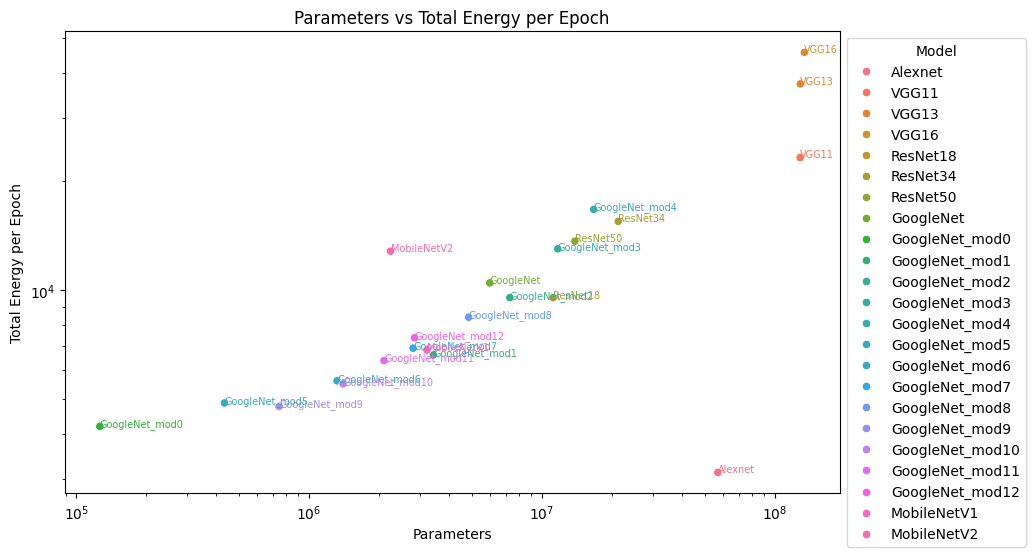

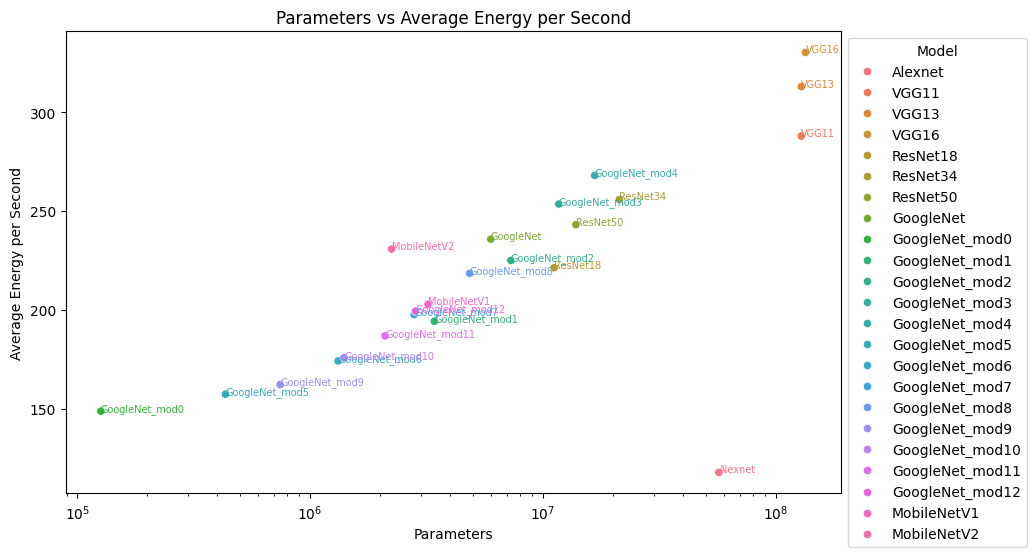

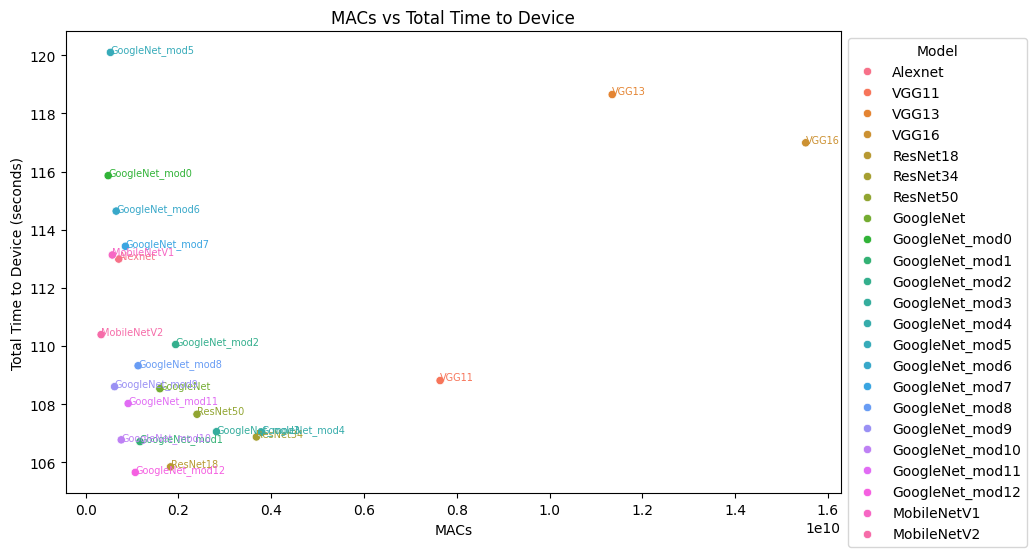

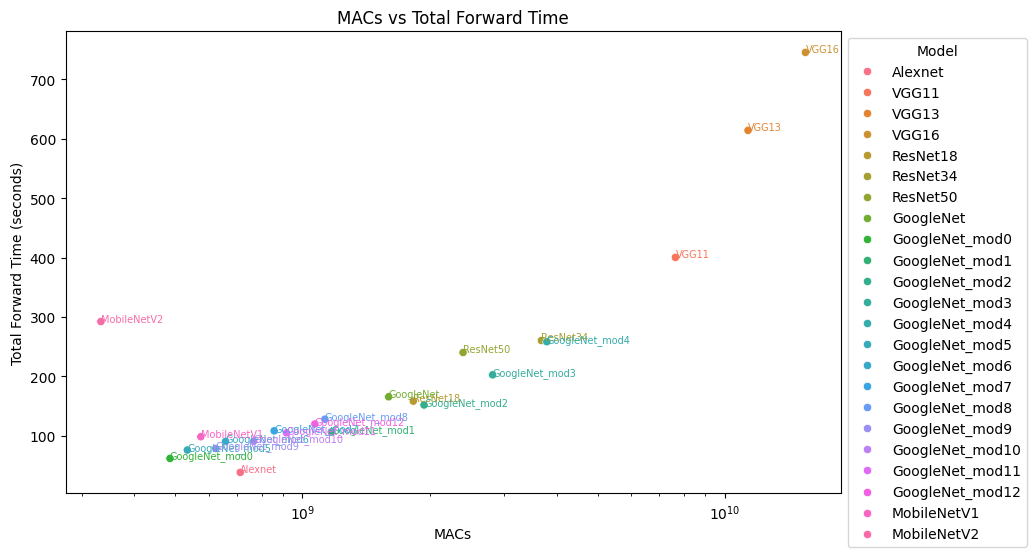

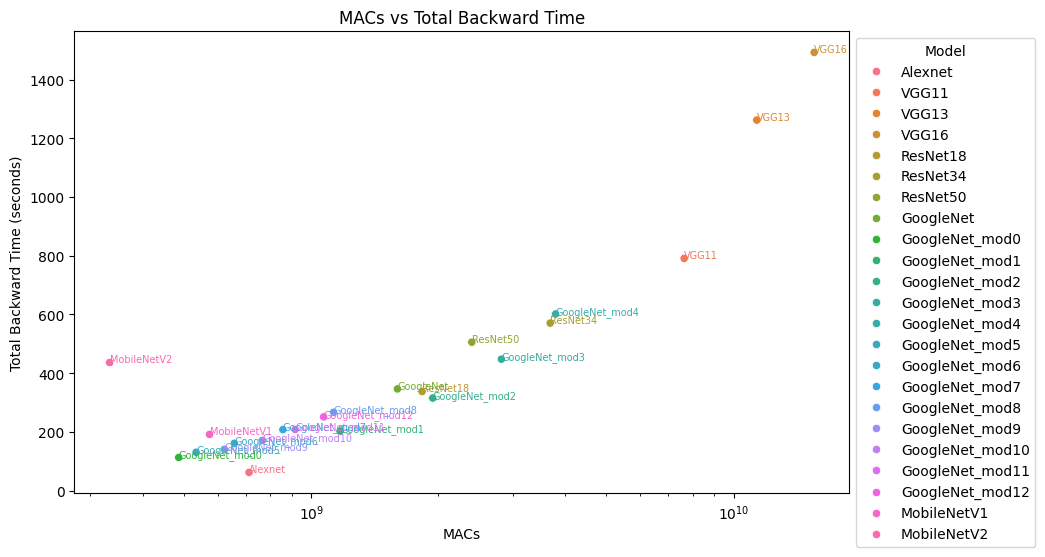

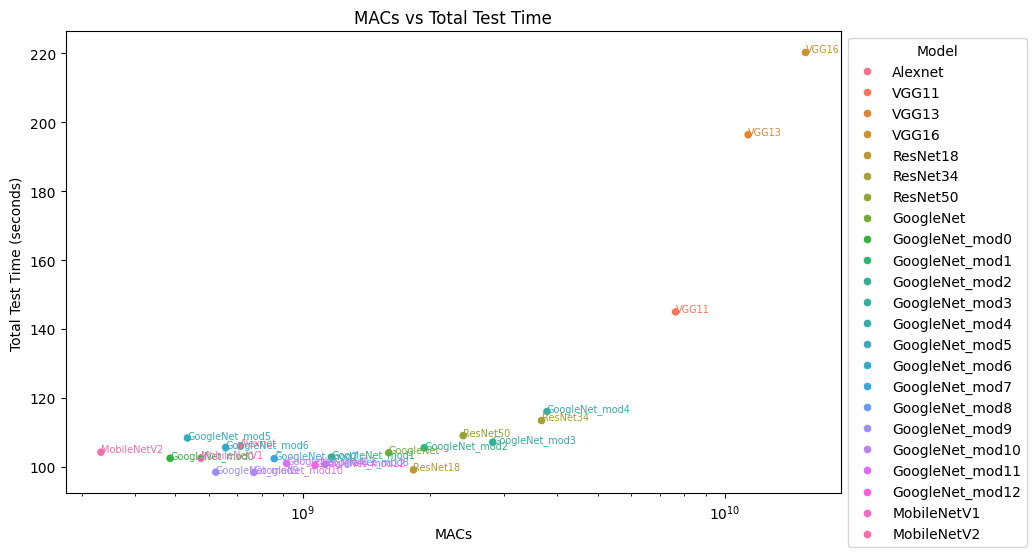

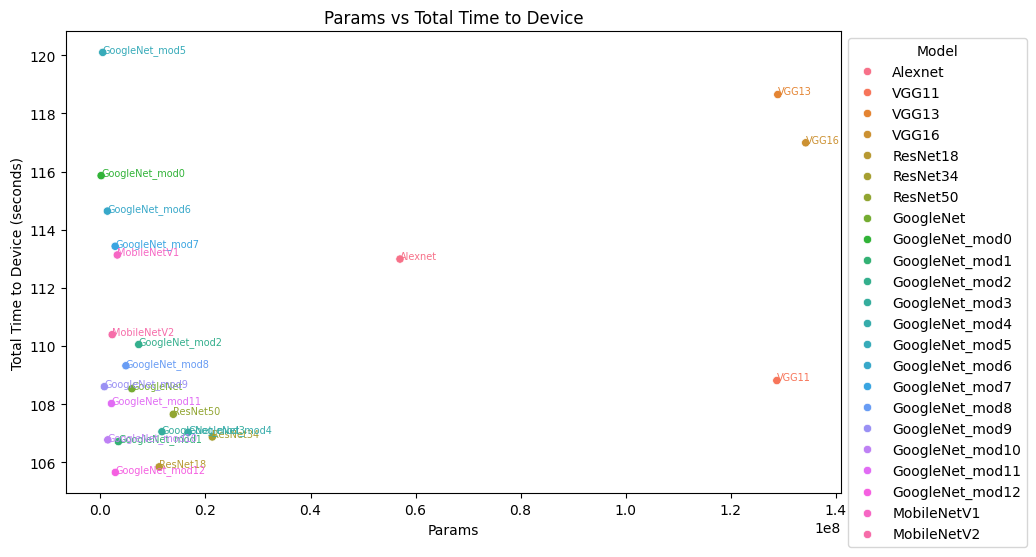

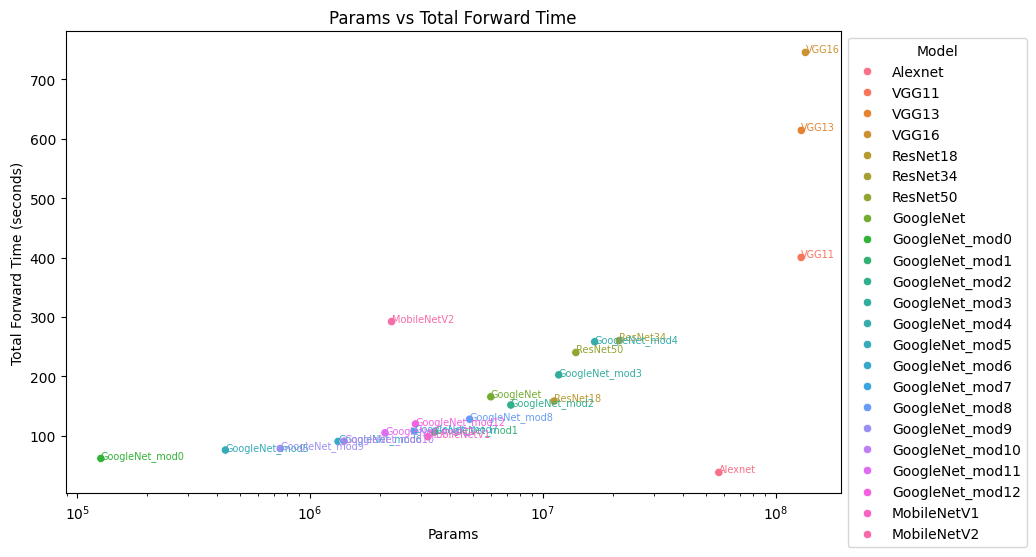

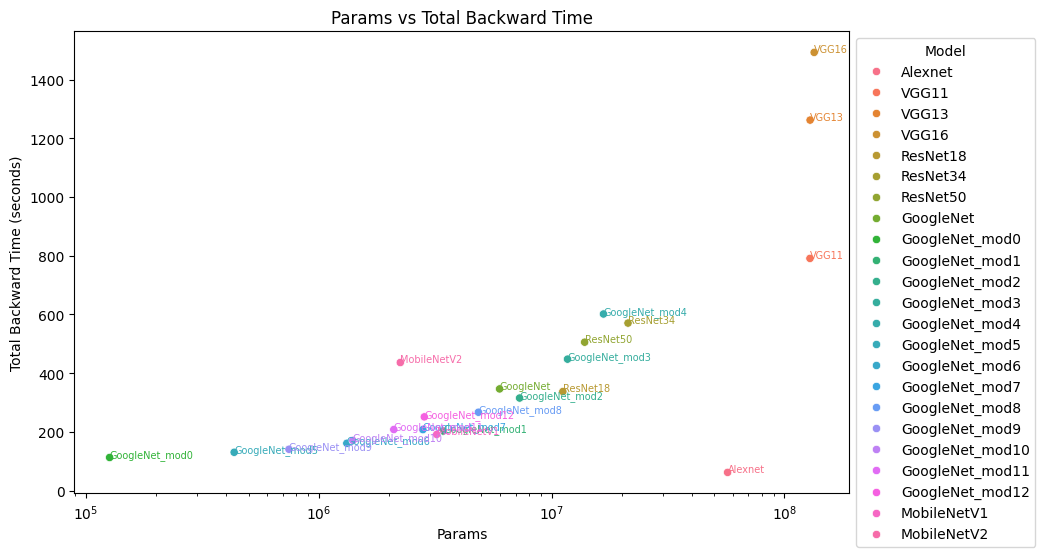

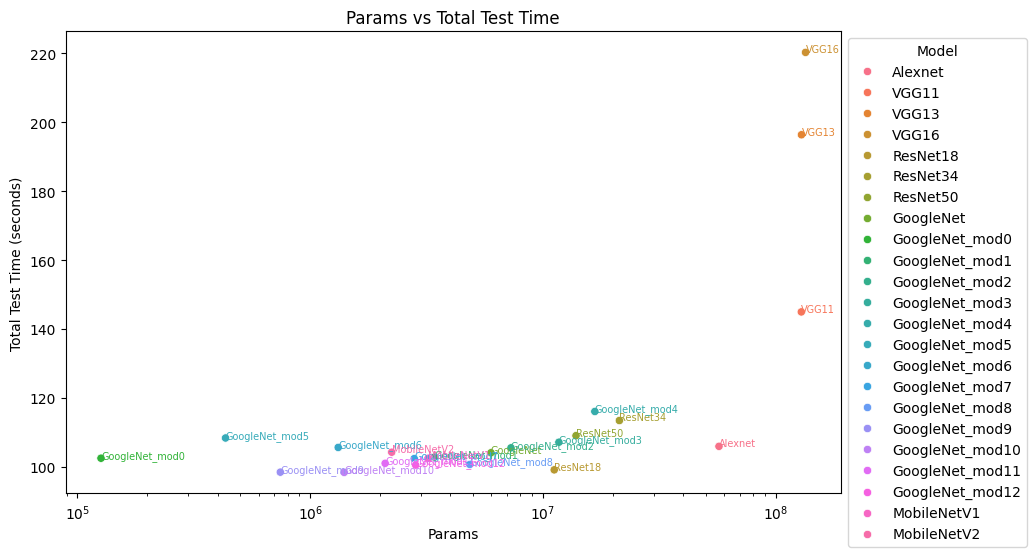

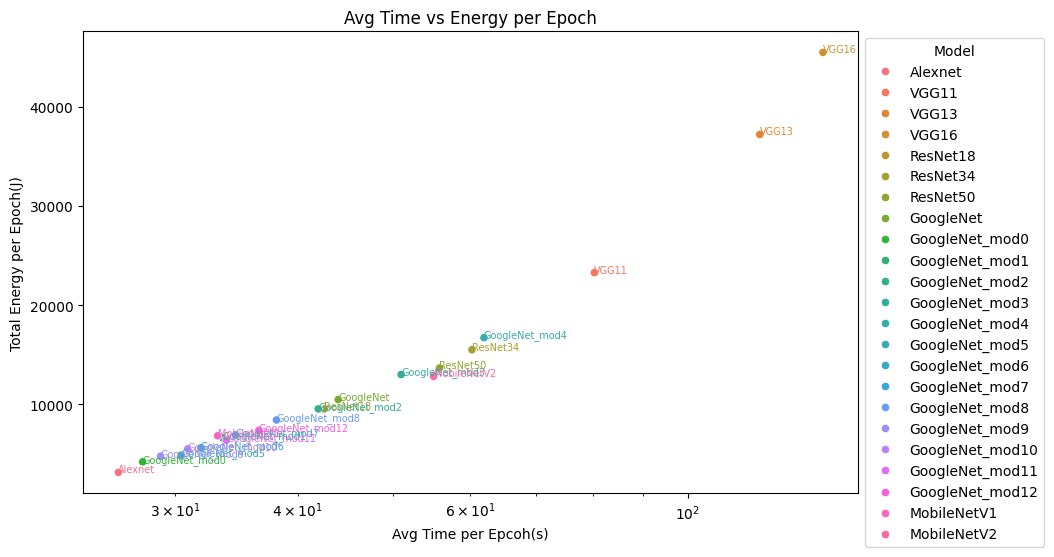

In [ ]:
PlotMACs_vs_Energy(df_c10)
PlotParas_vs_Time(df_c10)
PlotMACs_vs_TrainPartTime(df_c10)
PlotParas_vs_TrainPartTime(df_c10)
PlotEpochEnergy_vs_EpochTime(df_c10)

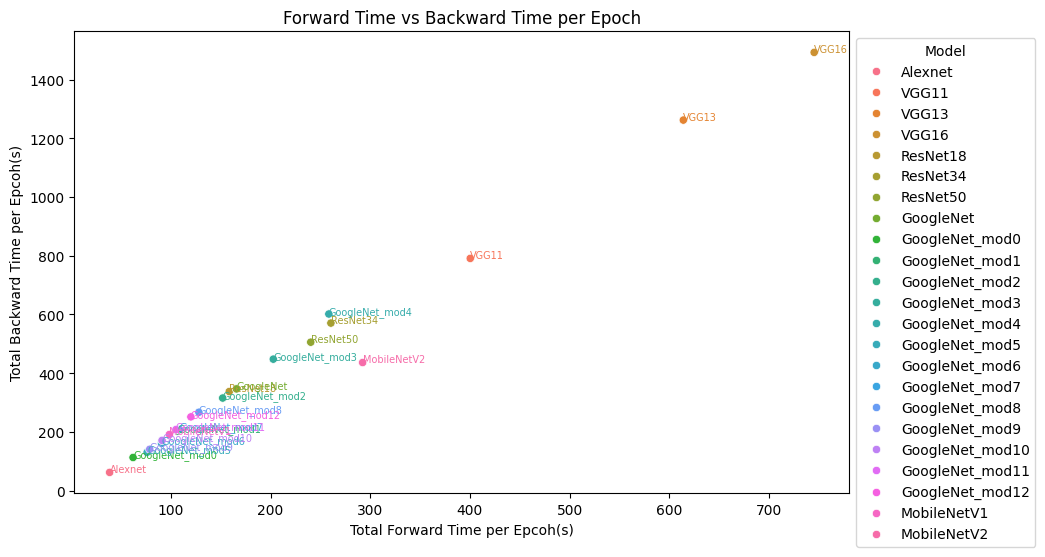

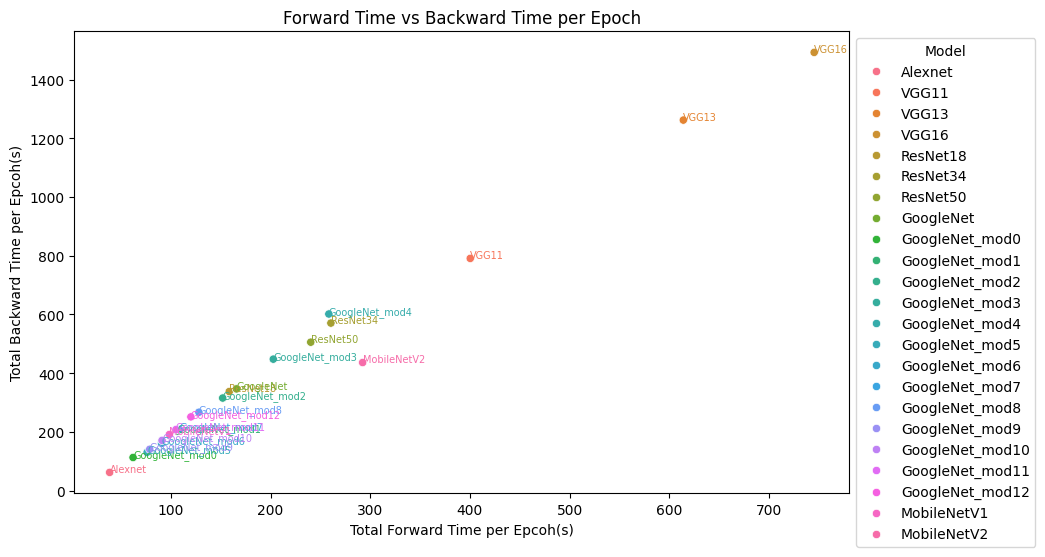

In [ ]:
PlotForwardTime_vs_BackwardTime(df_c10)
PlotForwardTime_vs_BackwardTime(df_c10)

In [ ]:
# save the dataframe to csv, and save to the data_model_dir
df_f.to_csv(os.path.join(data_model_dir, 'fashionmnist_datasetinfo.csv'), index=False)
df_c.to_csv(os.path.join(data_model_dir, 'cifar100_datasetinfo.csv'), index=False)
df_c10.to_csv(os.path.join(data_model_dir, 'cifar10_datasetinfo.csv'), index=False)